<a href="https://colab.research.google.com/github/jklee78e/EX99/blob/master/insulator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#################################################################################
# sample data that were measured from actual 154kV power transmission lines

# a sample of insulator string that consists of seven insulators
r7 = [2000,2000,298.2,2000,2000,0,2000,2000,298.2]     # insulator resistance
v7 = [9.8,7.7,5.2,5.5,6.5,0,8.8,7.7,5.3]               # distribution voltage

# sample data of insulator strings that consist of eight insulators
r8 = [ # insulator resistance
     [915.28,336.64,346.25,387.92,416.91,416.91,371.66,318.27],           # 1 Jeonju T/L Steel Tower no. 37
     [2000,2000,2000,2000,1626.02,1943.48,1943.48,1626.02],               # 2 Jeonju T/L Steel Tower no. 37
     [2000,1460.38,1499.03,2000,1581.72,1581.72,1230.69,1230.69],         # 3 Jeonju T/L Steel Tower no. 37
     [2000,1289.88,1581.72,1387.92,1124.76,1289.88,1149.83,864.11]       # 4 Jeonju T/L Steel Tower no. 37
     ]
v8 = [ # distribution voltage
     [13.63,9.33,7.37,7.17,6.78,5.54,6.85,7.04],	                     # 1 Jeonju T/L Steel Tower no. 37
     [17.28, 10.17, 8.87, 7.3, 6.46, 5.93, 6.13, 6.72], 	                        # 2 Jeonju T/L Steel Tower no. 37
     [18.39, 9.52, 8.35, 6.91, 6.13, 6.2, 5.93, 6.33], 	                        # 3 Jeonju T/L Steel Tower no. 37
     [18.06, 9.26, 8.15, 6.85, 5.93, 5.8, 5.87, 5.74] 	                        # 4 Jeonju T/L Steel Tower no. 37
     ]

# sample data of insulator strings that consist of nine insulators
r9 = [ # insulator resistance
     [2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000],                      # 1 Namwon T/L Steel Tower no. 65
     [2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000],                      # 2 Namwon T/L Steel Tower no. 66
     [2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000],                      # 3 Imsil T/L Steel Tower no. 29
     [2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000],                      # 4 Imsil T/L Steel Tower no. 29
     [2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000],                      # 5 Imsil T/L Steel Tower no. 29
     [2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000],                      # 6 Imsil T/L Steel Tower no. 29
     [2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000],                      # 7 Imsil T/L Steel Tower no. 29
     [2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000],                      # 8 Imsil T/L Steel Tower no. 29
     [1032.73, 429.22, 455.2, 441.98, 371.66, 387.92, 410.91, 346.25, 254.59],    # 9 Jeonju T/L Steel Tower no. 37
     [971.25, 322.76, 435.54, 448.53, 441.98, 366.42, 327.31, 346.25, 313.85],    # 10 Jeonju T/L Steel Tower no. 37
     [265.47, 261.79, 276.81, 296.79, 244.13, 227.58, 240.73, 251.06, 309.49],    # 11 Jeonju T/L Steel Tower no. 46-1
     [371.66, 280.69, 322.76, 305.2, 296.79, 300.96, 280.69, 296.79, 393.52],     # 12 Jeonju T/L Steel Tower no. 59
     [2000, 1672.47, 1883.42, 2000, 2000, 2000, 1772.54, 1460.38, 1826.52],       # 13 Jeonju T/L Steel Tower no. 46-1
     [2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000],                      # 14 Jeonju T/L Steel Tower no. 59
     [2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000]                      # 15 Jeonju T/L Steel Tower no. 63
     ]
v9 = [ # distribution voltage
     [13.04, 11.67, 9.39, 8.28, 7.30, 7.04, 7.24, 8.09, 10.11],                   # 1 Namwon T/L Steel Tower no. 65
     [13.63, 12.13, 9.33, 7.63, 6.65, 6.46, 6.06, 7.43, 9.20],                    # 2 Namwon T/L Steel Tower no. 66
     [13.50, 10.96, 9.33, 7.37, 7.43, 7.70, 6.52, 8.09, 10.37],                   # 3 Imsil T/L Steel Tower no. 29
     [14.35, 10.24, 9.39, 8.15, 7.96, 8.09, 7.56, 8.67, 10.17],                   # 4 Imsil T/L Steel Tower no. 29
     [14.61, 10.89, 8.61, 8.28, 8.22, 7.37, 7.96, 8.67, 10.70],                   # 5 Imsil T/L Steel Tower no. 29
     [12.91, 10.70, 9.20, 8.41, 7.70, 7.11, 8.28, 8.61, 10.96],                   # 6 Imsil T/L Steel Tower no. 29
     [13.89, 10.24, 9.00, 8.02, 7.89, 7.43, 8.02, 8.48, 10.76],                   # 7 Imsil T/L Steel Tower no. 29
     [15.39, 10.96, 8.74, 9.06, 8.35, 7.89, 8.02, 8.88, 10.24],                   # 8 Imsil T/L Steel Tower no. 29
     [14.87, 9.06, 6.2, 7.24, 7.17, 6.59, 7.17, 7.7, 8.48],                       # 9 Jeonju T/L Steel Tower no. 37
     [14.02, 7.7, 9.06, 7.7, 7.63, 6, 7.17, 7.5, 7.89], 	                        # 10 Jeonju T/L Steel Tower no. 37
     [11.35, 10.43, 8.15, 9.46, 7.04, 5.02, 7.37, 8.8, 11.74],                    # 11 Jeonju T/L Steel Tower no. 46-1
     [10.17, 8.09, 9.13, 8.93, 7.96, 7.04, 7.63, 8.8, 14.48],                     # 12 Jeonju T/L Steel Tower no. 59
     [13.96, 11.09, 8.87, 8.35, 6.72, 6.06, 6.59, 7.24, 10.3],                    # 13 Jeonju T/L Steel Tower no. 46-1
     [13.24, 11.54, 9.26, 8.28, 8.02, 7.17, 7.56, 8.54, 11.48],                   # 14 Jeonju T/L Steel Tower no. 59
     [15.98, 11.15, 8.54, 6.98, 6.98, 6, 6.2, 6.59, 9.65]                        # 15 Jeonju T/L Steel Tower no. 63
     ]

# sample data of insulator strings that consist of ten insulators
# The numbers in the first parentheses denote insulation resistance values estimated from Distribution Voltage-based Diagnosis Algorithm
# The numbers in the second parentheses denote insulation resistance values estimated from Insulation Resistance-based Diagnosis Algorithm
r10 = [ # insulation resistance
     [238.3, 383.6, 394.3, 376.2, 532, 297.1, 388.2, 319.6, 359, 394.3], 		# 1 Gongduk T/L Steel Tower no. 5
     [462.6, 354.9, 392.9, 435.5, 353.5, 433.8, 541.2, 506.2, 562.2, 460.7], 	# 2 Gongduk T/L Steel Tower no. 5
     [2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000], 		# 3 Gongduk T/L Steel Tower no. 81
     [2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000], 		# 4 Gongduk T/L Steel Tower no. 81
     [2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000], 		# 5 Gongduk T/L Steel Tower no. 81
     [2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000], 		# 6 Gongduk T/L Steel Tower no. 81
     [2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000], 		# 7 Gongduk T/L Steel Tower no. 81
     [2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000], 		# 8 Gongduk T/L Steel Tower no. 81
     [2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000], 		# 9 Gongduk T/L Steel Tower no. 81
     [2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000], 		# 10 Gongduk T/L Steel Tower no. 81
     [2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000], 		# 11 Gongduk T/L Steel Tower no. 72
     [2000, 2000, 2000, 2000, 10.3, 2000, 	0, 2000, 2000, 2000], 		# 12 Gongduk T/L Steel Tower no. 72 - The 5th & 7th insulators are faulty], 5th, 7th - (0, 0) - (12.8750, 0)
     [2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000], 		# 13 Gongduk T/L Steel Tower no. 72
     [2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000], 		# 14 Gongduk T/L Steel Tower no. 72
     [2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000], 		# 15 Gongduk T/L Steel Tower no. 72
     [2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000], 		# 16 Gongduk T/L Steel Tower no. 72
     [2000, 2000, 2000, 2000, 2.6,  2000, 2000, 2000, 2000, 2000], 		# 17 Gongduk T/L Steel Tower no. 72 - The 5th is faulty], 5th - (0) - (3.2500)
     [2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000], 		# 18 Gongduk T/L Steel Tower no. 72
     [2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000], 		# 19 Gongduk T/L Steel Tower no. 72
     [2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000], 		# 20 Gongduk T/L Steel Tower no. 72
     [2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000], 		# 21 Gongduk T/L Steel Tower no. 72
     [2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000], 		# 22 Gongduk T/L Steel Tower no. 72
     [2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000], 		# 23 Namwon T/L Steel Tower no. 44
     [2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000], 		# 24 Imsil T/L Steel Tower no. 31
     [2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000], 		# 25 Imsil T/L Steel Tower no. 31
     [2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000], 		# 26 Imsil T/L Steel Tower no. 31
     [2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000], 		# 27 Imsil T/L Steel Tower no. 31
     [2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000], 		# 28 Imsil T/L Steel Tower no. 31
     [2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000], 		# 29 Imsil T/L Steel Tower no. 31
     [2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000], 		# 30 Imsil T/L Steel Tower no. 18
     [2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000], 		# 31 Imsil T/L Steel Tower no. 18
     [2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000], 		# 32 Imsil T/L Steel Tower no. 18
     [2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000], 		# 33 Imsil T/L Steel Tower no. 18
     [2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000], 		# 34 Imsil T/L Steel Tower no. 18
     [2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2.94, 2000], 		# 35 Namwon T/L Steel Tower no. 59 - The 9th is faulty], 9th - (9.0094) - (3.6750)
     [2000, 2000, 1.93, 2000, 2000, 2000, 2000, 2000, 2000, 2000], 		# 36 Imsil T/L Steel Tower no. 20 - The 3rd is faulty], 3rd - (281.9587) - (2.4125)
     [272.98, 305.2, 309.49, 322.76, 356.17, 361.25, 361.25, 309.49, 356.17, 399.22],      # 37 Jeonju T/L Steel Tower no. 23
     [125.29, 261.79, 240.73, 261.79, 254.59, 254.59, 272.98, 288.63, 261.79, 387.92],     # 38 Jeonju T/L Steel Tower no. 23
     [2000, 218.15, 194.63, 165.7, 206.1, 206.1, 218.15, 227.58, 247.57, 382.41],          # 39 Jeonju T/L Steel Tower no. 23
     [81.61, 96.84, 95.09, 86.55, 89.92, 95.09, 98.61, 73.68, 78.4, 121.25],               # 40 Jeonju T/L Steel Tower no. 23
     [51.83, 78.4, 75.24, 70.6, 72.13, 73.68, 69.08, 78.4, 70.6, 115.34],                  # 41 Jeonju T/L Steel Tower no. 23
     [73.68, 76.81, 70.6, 73.68, 78.4, 91.62, 107.73, 104.03, 70.6, 98.61],                # 42 Jeonju T/L Steel Tower no. 23
     [278.62, 305.2, 292.68, 356.17, 272.98, 292.68, 300.96, 265.47, 265.47, 366.42],      # 43 Jeonju T/L Steel Tower no. 28
     [405.02, 521.25, 468.92, 572.32, 429.22, 441.98, 2.94, 685.11, 490.49, 880.67],       # 44 Jeonju T/L Steel Tower no. 35 - The 7th is faulty], 7th - (6.6464) - (16.1631)
     [376.99, 313.85, 336.64, 327.31, 327.31, 313.85, 265.47, 313.85, 284.63, 1353.91],    # 45 Jeonju T/L Steel Tower no. 37
     [346.25, 346.25, 371.66, 346.25, 313.85, 376.99, 346.25, 361.25, 429.22, 1626.02],    # 46 Jeonju T/L Steel Tower no. 37
     [254.59, 2000, 212.05, 261.79, 189.09, 265.47, 258.17, 212.05, 269.2, 258.17],        # 47 Jeonju T/L Steel Tower no. 38
     [346.25, 322.76, 341.41, 292.68, 212.05, 341.41, 331.94, 371.66, 416.91, 1149.83],    # 48 Jeonju T/L Steel Tower no. 39
     [2000, 462, 410.91, 546, 513.33, 393.52, 600.38, 685.11, 817.14, 1581.72],            # 49 Jeonju T/L Steel Tower no. 41
     [455.2, 429.22, 393.52, 416.91, 313.85, 322.76, 318.27, 276.81, 272.98, 455.2],       # 50 Jeonju T/L Steel Tower no. 23
     [237.38, 288.63, 296.79, 254.59, 251.06, 230.81, 224.4, 269.2, 244.13, 462],          # 51 Jeonju T/L Steel Tower no. 23
     [537.58, 483.16, 331.94, 448.53, 423.01, 399.22, 382.41, 341.41, 296.79, 600.38],     # 52 Jeonju T/L Steel Tower no. 23
     [1581.72, 1032.73, 971.25, 1054.59, 864.11, 1011.58, 1175.8, 802.34, 733.91, 1826.52],# 53 Jeonju T/L Steel Tower no. 28
     [1826.52, 2000, 1772.54, 2000, 1826.52, 2000, 36.21, 2000, 2000, 2000],               # 54 Jeonju T/L Steel Tower no. 35 - The 7th is faulty], 7th - (5.3918) - (45.9829)
     [1289.88, 1032.73, 1124.76, 864.11, 760.22, 662.43, 546, 554.59, 620.13, 2000],       # 55 Jeonju T/L Steel Tower no. 37
     [2000, 2000, 2000, 2000, 2000, 2000, 1626.02, 1626.02, 1175.8, 1539.44],              # 56 Jeonju T/L Steel Tower no. 38
     [2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000],                         # 57 Jeonju T/L Steel Tower no. 39
     [2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000],                         # 58 Jeonju T/L Steel Tower no. 41
     [182.12, 214.29, 244.09, 285.71, 315.79, 277.67, 285.71, 258.5, 266.01, 392.25],      # 59 Hamyeol T/L Steel Tower no. 36
     [205.08, 247.62, 258.5, 258.5, 285.71, 269.84, 285.71, 306.88, 269.84, 359.45],       # 60 Hamyeol T/L Steel Tower no. 36
     [196.21, 208.11, 214.29, 230.41, 244.09, 233.77, 262.23, 244.09, 262.23, 375.44],     # 61 Hamyeol T/L Steel Tower no. 36
     [233.77, 187.66, 205.08, 220.61, 199.13, 208.11, 247.62, 240.6, 227.11, 370.02],      # 62 Hamyeol T/L Steel Tower no. 36
     [139.82, 196.21, 190.48, 205.08, 187.66, 199.13, 214.29, 230.41, 220.61, 254.83],     # 63 Hamyeol T/L Steel Tower no. 36
     [230.41, 220.61, 247.62, 277.67, 244.09, 262.23, 289.83, 306.88, 273.73, 386.55],     # 64 Hamyeol T/L Steel Tower no. 36
     [873.71, 311.3, 403.94, 398.05, 506.36, 613.16, 375.44, 506.36, 469, 556.39],         # 65 Hamyeol T/L Steel Tower no. 49
     [461.95, 298.23, 294, 320.35, 354.29, 441.56, 262.23, 403.94, 254.83, 302.52],        # 66 Hamyeol T/L Steel Tower no. 49
     [435.01, 285.71, 306.88, 386.55, 435.01, 441.56, 370.02, 403.94, 359.45, 392.25],     # 67 Hamyeol T/L Steel Tower no. 49
     [623.38, 344.21, 344.21, 344.21, 359.45, 380.95, 311.3, 416.04, 380.95, 285.71],      # 68 Hamyeol T/L Steel Tower no. 49
     [689.9, 364.69, 386.55, 364.69, 409.94, 483.52, 469, 392.25, 344.21, 398.05],         # 69 Hamyeol T/L Steel Tower no. 49
     [666.67, 364.69, 422.25, 392.25, 461.95, 398.05, 483.52, 422.25, 386.55, 530.61],     # 70 Hamyeol T/L Steel Tower no. 49
     [2000, 2000, 2000, 2000, 2.03, 2000, 1819.55, 9.49, 2000, 2000]                      # 71 Shingyeryongeunjin T/L Tower no. 61 - The 5th & 8th insulators are faulty], 5th, 8th - (15.6374, 5.9727) - (2.5684, 12.1176)
     ]
v10 = [ # distribution voltage
     [13.84, 12.79, 10.69, 9.54, 6.94, 7.32, 7.26, 5.99, 6.94, 7.67],                      # 1 Gongduk T/L Steel Tower no. 5
     [13.58, 10.73, 9.91, 8.31, 8.15, 7.28, 6.72, 6.86, 7.79, 9.66],                       # 2 Gongduk T/L Steel Tower no. 5
     [15.76, 10.39, 10.13, 8.01, 8.29, 7.51, 6.91, 6.69, 7.10, 8.20],                      # 3 Gongduk T/L Steel Tower no. 81
     [14.85, 10.47, 9.73, 8.52, 7.72, 7.54, 7.22, 6.85, 7.45, 8.66],                       # 4 Gongduk T/L Steel Tower no. 81
     [15.16, 10.02, 9.92, 8.87, 8.04, 7.17, 7.08, 6.89, 6.62, 9.24],                       # 5 Gongduk T/L Steel Tower no. 81
     [15.29, 9.86, 8.82, 8.58, 7.50, 7.69, 7.12, 7.50, 8.25, 8.40],                        # 6 Gongduk T/L Steel Tower no. 81
     [15.63, 10.24, 9.71, 8.80, 7.36, 7.64, 7.55, 7.55, 6.11, 8.41],                       # 7 Gongduk T/L Steel Tower no. 81
     [14.87, 9.89, 8.87, 7.83, 8.35, 8.25, 7.50, 7.69, 7.41, 8.35],                        # 8 Gongduk T/L Steel Tower no. 81
     [15.69, 9.99, 9.76, 8.59, 7.64, 7.91, 7.14, 7.19, 6.78, 8.32],                        # 9 Gongduk T/L Steel Tower no. 81
     [14.03, 10.19, 9.72, 8.94, 7.64, 7.23, 7.55, 6.99, 7.83, 8.89],                       # 10 Gongduk T/L Steel Tower no. 81
     [16.59, 12.11, 9.41, 8.14, 7.27, 6.90, 6.70, 6.90, 6.98, 8.01],                       # 11 Gongduk T/L Steel Tower no. 72
     [15.75, 12.10, 11.43, 10.64, 0.00, 10.10, 0.00, 9.31, 9.39, 10.27],                   # 12 Gongduk T/L Steel Tower no. 72 - The 5th & 7th insulators are faulty
     [16.25, 12.19, 9.67, 8.57, 7.39, 7.06, 6.82, 6.46, 6.99, 7.60],                       # 13 Gongduk T/L Steel Tower no. 72
     [14.65, 10.65, 9.24, 8.12, 7.39, 7.64, 7.43, 7.26, 7.78, 8.85],                       # 14 Gongduk T/L Steel Tower no. 72
     [16.00, 11.75, 9.51, 7.94, 7.32, 7.57, 6.66, 6.74, 7.24, 8.27],                       # 15 Gongduk T/L Steel Tower no. 72
     [13.93, 11.22, 9.26, 8.54, 7.65, 6.88, 6.88, 7.22, 8.11, 9.30],                       # 16 Gongduk T/L Steel Tower no. 72
     [15.58, 12.32, 10.36, 9.95, 0.00, 9.02, 7.71, 7.54, 7.95, 8.56],                      # 17 Gongduk T/L Steel Tower no. 72 - The 5th is faulty
     [12.96, 10.61, 9.58, 8.46, 7.76, 7.35, 7.80, 7.51, 8.09, 8.88],                       # 18 Gongduk T/L Steel Tower no. 72
     [14.40, 11.02, 9.48, 8.47, 7.95, 7.50, 7.18, 7.10, 7.63, 8.27],                       # 19 Gongduk T/L Steel Tower no. 72
     [13.12, 10.95, 10.09, 9.24, 8.44, 7.75, 7.92, 7.83, 7.11, 6.56],                      # 20 Gongduk T/L Steel Tower no. 72
     [12.51, 11.15, 9.52, 8.79, 8.40, 7.70, 7.24, 7.67, 7.70, 8.33],                       # 21 Gongduk T/L Steel Tower no. 72
     [12.87, 10.76, 9.58, 8.73, 8.33, 7.55, 7.39, 7.47, 7.88, 8.44],                       # 22 Gongduk T/L Steel Tower no. 72
     [13.37, 10.70, 8.87, 7.56, 6.72, 5.87, 5.74, 6.13, 7.04, 8.54],                       # 23 Namwon T/L Steel Tower no. 44
     [13.30, 10.37, 8.93, 7.37, 6.46, 5.67, 6.20, 6.00, 7.37, 8.74],                       # 24 Imsil T/L Steel Tower no. 31
     [14.09, 9.85, 8.54, 8.15, 7.04, 6.85, 6.59, 6.72, 7.04, 9.13],                        # 25 Imsil T/L Steel Tower no. 31
     [12.06, 9.78, 9.06, 8.67, 6.91, 6.85, 7.24, 6.98, 8.09, 9.52],                        # 26 Imsil T/L Steel Tower no. 31
     [12.98, 9.85, 9.26, 8.09, 7.04, 6.78, 6.59, 6.33, 7.11, 10.24],                       # 27 Imsil T/L Steel Tower no. 31
     [12.06, 10.76, 10.11, 7.43, 6.85, 7.24, 6.65, 7.04, 7.43, 9.33],                      # 28 Imsil T/L Steel Tower no. 31
     [13.30, 11.35, 9.20, 8.09, 6.91, 6.52, 7.30, 6.78, 7.24, 9.33],                       # 29 Imsil T/L Steel Tower no. 31
     [13.17, 10.56, 8.87, 7.70, 7.17, 6.78, 6.78, 6.91, 7.70, 9.78],                       # 30 Imsil T/L Steel Tower no. 18
     [13.76, 10.37, 8.67, 7.63, 7.17, 6.85, 6.72, 7.24, 8.22, 10.43],                      # 31 Imsil T/L Steel Tower no. 18
     [15.52, 12.46, 9.52, 8.35, 7.11, 6.52, 6.39, 6.33, 7.70, 9.91],                       # 32 Imsil T/L Steel Tower no. 18
     [12.52, 10.37, 8.87, 7.56, 6.98, 6.52, 6.39, 6.65, 7.17, 9.33],                       # 33 Imsil T/L Steel Tower no. 18
     [12.91, 10.30, 8.74, 7.56, 6.85, 6.52, 6.39, 6.91, 7.76, 10.17],                      # 34 Imsil T/L Steel Tower no. 18
     [15.59, 11.15, 9.06, 7.43, 6.39, 6.13, 6.33, 7.56, 1.11, 9.91],                       # 35 Namwon T/L Steel Tower no. 59 - The 9th is faulty
     [16.5, 14.22, 6.91, 9.91, 8.41, 6.72, 7.37, 6.52, 7.56, 10.04],                       # 36 Imsil T/L Steel Tower no. 20 - The 3rd is faulty
     [8.74, 9.06, 7.43, 6.91, 7.7, 6.65, 6.72, 5.67, 7.04, 9.91],                          # 37 Jeonju T/L Steel Tower no. 23
     [6.13, 9.26, 7.56, 6.2, 7.04, 6.72, 6.85, 7.37, 6.78, 11.41],                         # 38 Jeonju T/L Steel Tower no. 23
     [10.89, 8.93, 7.5, 7.11, 6, 6.06, 6.59, 7.56, 7.56, 10.83],                           # 39 Jeonju T/L Steel Tower no. 23
     [8.02, 8.15, 6.91, 6.46, 6.46, 6.2, 6.33, 5.41, 6.85, 10.43],                         # 40 Jeonju T/L Steel Tower no. 23
     [8.8, 8.48, 7.11, 6, 6.46, 6.26, 6.13, 6.91, 6.59, 11.8],                             # 41 Jeonju T/L Steel Tower no. 23
     [10.5, 8.15, 6.98, 6.72, 5.74, 5.87, 6.52, 8.41, 7.63, 11.02],                        # 42 Jeonju T/L Steel Tower no. 23
     [15.91, 8.15, 8.02, 7.24, 7.04, 6, 7.04, 6.72, 7.43, 10.5],                           # 43 Jeonju T/L Steel Tower no. 28
     [9.72, 9.65, 9.33, 9.33, 7.96, 7.89, 0.78, 7.76, 7.43, 10.96],                        # 44 Jeonju T/L Steel Tower no. 35 - The 7th is faulty
     [10.63, 8.54, 8.54, 7.96, 6.85, 6.33, 6.06, 6.33, 5.02, 10.04],                       # 45 Jeonju T/L Steel Tower no. 37
     [9.78, 8.02, 6.98, 7.5, 6.06, 6.52, 5.41, 6.13, 6.72, 11.35],                         # 46 Jeonju T/L Steel Tower no. 37
     [10.56, 8.41, 6.85, 7.43, 6.46, 5.8, 7.24, 5.41, 7.43, 10.63],                        # 47 Jeonju T/L Steel Tower no. 38
     [9.98, 8.15, 7.96, 6.65, 6.72, 6.91, 6.78, 6.91, 8.02, 10.76],                        # 48 Jeonju T/L Steel Tower no. 39
     [6.85, 10.24, 7.5, 8.74, 5.02, 5.67, 5.61, 6.52, 7.56, 10.37],                        # 49 Jeonju T/L Steel Tower no. 41
     [9.98, 9.33, 8.02, 7.37, 6.33, 6.52, 6.06, 6.13, 6.13, 9.78],                         # 50 Jeonju T/L Steel Tower no. 23
     [10.3, 8.74, 7.76, 6.78, 6.72, 6.26, 6.06, 6.46, 7.24, 11.15],                        # 51 Jeonju T/L Steel Tower no. 23
     [11.67, 10.11, 8.67, 7.37, 6.33, 6.33, 6.39, 6.65, 6.98, 11.41],                      # 52 Jeonju T/L Steel Tower no. 23
     [10.7, 9.26, 8.09, 6.98, 6.78, 6.52, 6.78, 6.52, 6.33, 9.65],                         # 53 Jeonju T/L Steel Tower no. 28
     [11.87, 10.43, 9, 8.93, 7.7, 8.41, 0.59, 6.98, 7.11, 9.59],                           # 54 Jeonju T/L Steel Tower no. 35 - The 7th is faulty
     [11.74, 9.13, 7.89, 6.72, 7.17, 6.33, 5.61, 5.15, 5.67, 9.06],                        # 55 Jeonju T/L Steel Tower no. 37
     [13.96, 9.65, 7.89, 6.91, 6.39, 5.67, 5.8, 6.2, 6.72, 9.65],                          # 56 Jeonju T/L Steel Tower no. 38
     [12.78, 9.65, 8.54, 7.3, 6.33, 6.26, 6.06, 5.93, 6.72, 9.26],                         # 57 Jeonju T/L Steel Tower no. 39
     [12.26, 10.83, 9.46, 7.7, 6.85, 6.46, 6.13, 6.13, 6.72, 8.48],                        # 58 Jeonju T/L Steel Tower no. 41
     [9.33, 9.33, 8.74, 8.74, 7.37, 8.02, 7.56, 8.02, 8.28, 10.76],                        # 59 Hamyeol T/L Steel Tower no. 36
     [9.59, 9.78, 8.35, 8.22, 7.89, 7.5, 7.63, 8.09, 8.22, 11.02],                         # 60 Hamyeol T/L Steel Tower no. 36
     [9.26, 9.72, 8.67, 8.02, 7.43, 7.3, 7.43, 7.83, 8.15, 10.7],                          # 61 Hamyeol T/L Steel Tower no. 36
     [6.13, 9.72, 8.74, 8.22, 7.56, 7.5, 8.02, 7.7, 8.15, 10.76],                          # 62 Hamyeol T/L Steel Tower no. 36
     [9.26, 9.91, 8.74, 7.89, 7.5, 7.24, 6.98, 7.83, 7.5, 10.17],                          # 63 Hamyeol T/L Steel Tower no. 36
     [9.78, 9.52, 8.93, 8.41, 7.76, 7.11, 6.91, 7.11, 7.5, 9.72],                          # 64 Hamyeol T/L Steel Tower no. 36
     [11.35, 9.13, 8.61, 6.98, 6.98, 7.56, 6.72, 6.46, 7.11, 9.13],                        # 65 Hamyeol T/L Steel Tower no. 49
     [11.28, 9.59, 8.48, 7.76, 6.78, 7.5, 6.78, 7.24, 7.37, 9.2],                          # 66 Hamyeol T/L Steel Tower no. 49
     [10.3, 8.67, 8.15, 7.89, 7.3, 7.11, 7.04, 7.5, 7.89, 10.5],                           # 67 Hamyeol T/L Steel Tower no. 49
     [10.7, 9.46, 7.96, 7.96, 7.43, 7.43, 7.3, 7.37, 8.02, 9.98],                          # 68 Hamyeol T/L Steel Tower no. 49
     [10.89, 9.46, 8.67, 7.76, 7.17, 7.37, 7.04, 7.89, 7.96, 10.43],                       # 69 Hamyeol T/L Steel Tower no. 49
     [10.7, 9.52, 8.48, 7.76, 7.96, 6.72, 7.04, 7.5, 7.89, 10.63],                         # 70 Hamyeol T/L Steel Tower no. 49
     [13.56, 11.09, 9.46, 10.17, 2.09, 9.46, 9.2, 0.85, 9.52, 12.65]                      # 71 Shingyeryongeunjin T/L Tower no. 61 - The 5th & 8th insulators are faulty
     ]

 # sample data of insulator strings that consist of eleven insulators
r11 = [ # insulation resistance
     [2000, 2000, 2000, 2000, 2000, 2000, 2000, 12.1, 2000, 2000, 2000],                    # 1 Gongduk T/L Steel Tower no. 72 - The 8th is faulty], 8th - (0) - (15.1250)
     [2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 12.1, 2000, 2000],                    # 2 Gongduk T/L Steel Tower no. 72 - The 9th is faulty], 9th - (0) - (15.1250)
     [2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000],                    # 3 Gongduk T/L Steel Tower no. 72
     [2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000],                    # 4 Gongduk T/L Steel Tower no. 72
     [2000, 2000, 2000, 2000, 2000, 2000,    0, 2000, 2000, 2000, 2000],                    # 5 Gongduk T/L Steel Tower no. 72 - The 7th is faulty], 7th - (0) - (0)
     [2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000],                    # 6 Gongduk T/L Steel Tower no. 72
     [2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000],                    # 7 Gongduk T/L Steel Tower no. 72
     [2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000],                    # 8 Gongduk T/L Steel Tower no. 72
     [2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000],                    # 9 Gongduk T/L Steel Tower no. 72
     [2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000],                    # 10 Gongduk T/L Steel Tower no. 72
     [2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000],                    # 11 Gongduk T/L Steel Tower no. 72
     [2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000]                    # 12 Gongduk T/L Steel Tower no. 72
    ]
v11 = [ # distribution voltage
     [15.63, 12.12, 9.40, 8.37, 7.84, 7.14, 7.05, 0.00, 7.05, 6.84, 7.54],                  # 1 Gongduk T/L Steel Tower no. 72 - The 8th is faulty
     [14.70, 11.31, 9.03, 7.95, 7.42, 6.96, 6.83, 7.37, 0.00, 8.28, 9.15],                  # 2 Gongduk T/L Steel Tower no. 72 - The 9th is faulty
     [16.22, 11.87, 9.54, 7.93, 6.92, 6.16, 5.99, 5.71, 5.75, 6.12, 6.80],                  # 3 Gongduk T/L Steel Tower no. 72
     [13.90, 10.57, 8.70, 7.75, 6.89, 6.67, 6.19, 6.41, 6.58, 6.97, 8.36],                  # 4 Gongduk T/L Steel Tower no. 72
     [15.70, 11.67, 9.18, 8.01, 7.52, 7.26, 0.00, 7.06, 6.93, 7.48, 8.18],                  # 5 Gongduk T/L Steel Tower no. 72 - The 7th is faulty
     [13.67, 10.53, 8.66, 7.75, 6.80, 6.32, 6.18, 6.44, 6.80, 7.36, 8.49],                  # 6 Gongduk T/L Steel Tower no. 72
     [13.86, 10.16, 8.80, 7.76, 7.43, 7.05, 6.68, 6.43, 6.55, 6.64, 7.63],                  # 7 Gongduk T/L Steel Tower no. 72
     [12.20, 10.34, 9.26, 7.83, 7.18, 6.79, 6.75, 6.71, 6.88, 7.22, 7.83],                  # 8 Gongduk T/L Steel Tower no. 72
     [14.22, 10.75, 9.10, 8.23, 7.41, 6.79, 6.39, 6.19, 6.31, 6.55, 7.06],                  # 9 Gongduk T/L Steel Tower no. 72
     [12.70, 10.21, 8.84, 8.22, 7.59, 7.10, 6.31, 6.43, 6.60, 6.93, 8.09],                  # 10 Gongduk T/L Steel Tower no. 72
     [13.74, 11.06, 8.89, 8.35, 7.36, 6.93, 6.53, 6.10, 6.30, 6.34, 7.40],                  # 11 Gongduk T/L Steel Tower no. 72
     [12.97, 10.38, 9.31, 8.37, 6.85, 6.15, 7.02, 6.41, 6.15, 7.18, 8.20]                  # 12 Gongduk T/L Steel Tower no. 72
    ]

 # sample data of insulator strings that consist of twelve insulators
r12 = [2000, 267, 2000, 2000, 316.8, 2000, 263.2, 4, 2000, 2000, 2000, 2000]     # insulator resistance
v12 = [10, 8, 7.8, 9.1, 7.5, 7.6, 8, 2, 7.7, 9.6, 7.8, 8.9]                      # distribution voltage

# sample data of insulator strings that were measured from 154kV Haenam-Jindo T/L,Shingangjin-Haenam T/L in 2010
r10h = [ # insulation resistance
    [129.9, 	 41.7, 	 40.2, 	 27.7, 	 22.4, 	 33.1, 	 30.4, 	 27.7, 	 12.3, 	 43.1],
    [2000, 	 475.1, 	 482.6, 	 482.6, 	 467.8, 	 66.2, 	 594.8, 	 566.1, 	 636.1, 	 705.9],
    [2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 316.6],
    [2000, 	 2000, 	 2000, 	 2000, 	 1868, 	 2.2, 	 2000, 	 2000, 	 2000, 	 2000],
    [136, 	 401.5, 	 351, 	 361.6, 	 460.6, 	 367, 	 467.8, 	 460.6, 	 383.8, 	 453.5],
    [6.1, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000],
    [32.2, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000],
    [2000, 	 2000, 	 1663.4, 	 47, 	 2000, 	 2000, 	 2000, 	 2000, 	 47, 	 2000],
    [2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 188.4, 	 2000],
    [2000, 	 2000, 	 1451.4, 	 545.6, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000],
    [1140.8, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 40.1, 	 2000, 	 1997.9, 	 2000],
    [2000, 	 2000, 	 4.1, 	 2000, 	 2000, 	 2000, 	 2000, 	 22.3, 	 2000, 	 2000],
    [2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 40.1, 	 2000, 	 2000],
    [2000, 	 2000, 	 2000, 	 2000, 	 131.1, 	 2000, 	 2000, 	 72.6, 	 2000, 	 57.1],
    [2000, 	 2000, 	 793.3, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000],
    [106.3, 	 2000, 	 69.4, 	 2000, 	 2000, 	 80.9, 	 2000, 	 2000, 	 2000, 	 2000],
    [2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 80.9, 	 1997.9, 	 2000],
    [1068.2, 	 2000, 	 2000, 	 2000, 	 2.1, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000],
    [235.1, 	 9.6, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000],
    [2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 15.3, 	 2000],
    [14.1, 	 1712.2, 	 2000, 	 100.6, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000],
    [2000, 	 2000, 	 2000, 	 2000, 	 1572.7, 	 2000, 	 2000, 	 11.9, 	 256.4, 	 249.1],
    [11.9, 	 11.9, 	 2000, 	 3.1, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000],
    [1023.7, 	 2000, 	 2000, 	 2.1, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000],
    [2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 74.2],
    [49.8, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000],
    [2000, 	 2000, 	 4.1, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000],
    [277.3, 	 1928.1, 	 2000, 	 2000, 	 2000, 	 250.1, 	 2000, 	 2000, 	 2000, 	 2000],
    [1160.4, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 92.4, 	 2000, 	 2000],
    [2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 8.9, 	 2000, 	 2000, 	 2000, 	 2000],
    [2000, 	 1814.4, 	 398.7, 	 90, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000],
    [2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 3.2, 	 2000, 	 2000, 	 2000],
    [2000, 	 48.1, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000],
    [84.7, 	 2000, 	 2000, 	 72.7, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000],
    [2000, 	 86.4, 	 2000, 	 14.4, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000],
    [51, 	 2000, 	 2000, 	 2000, 	 119.3, 	 748.1, 	 179.7, 	 2000, 	 2000, 	 2000],
    [2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 1.1, 	 2000, 	 2000],
    [2000, 	 2000, 	 7.2, 	 2000, 	 2000, 	 1.1, 	 2000, 	 2000, 	 48.1, 	 2000]
	]   
v10h = [ # distribution voltage
    [9.8, 	 8.4, 	 8, 	 6.3, 	 5.6, 	 6.3, 	 7, 	 6.8, 	 3.4, 	 7],
    [1.6, 	 12, 	 7.5, 	 8.4, 	 8.2, 	 4.2, 	 7.2, 	 6.9, 	 7.7, 	 9.3],
    [11.2, 	 11.2, 	 9.7, 	 8.9, 	 8.3, 	 7.3, 	 7.5, 	 7.4, 	 8.5, 	 7.5],
    [14.7, 	 11, 	 9.1, 	 7.8, 	 7, 	 2.3, 	 6, 	 5.9, 	 7.2, 	 8.6],
    [6.8, 	 12.3, 	 9.2, 	 7, 	 6.5, 	 5.7, 	 6.3, 	 5.8, 	 6.3, 	 9.6],
    [7, 	 14.2, 	 11, 	 10.4, 	 9.3, 	 8.3, 	 7.6, 	 8, 	 8.5, 	 8.3],
    [7.6, 	 12.7, 	 11.2, 	 9.9, 	 8.1, 	 8, 	 7.6, 	 8.1, 	 8.3, 	 10.6],
    [16, 	 15.7, 	 12.8, 	 4.2, 	 9.7, 	 8.9, 	 8.9, 	 9.5, 	 5.2, 	 11.3],
    [11, 	 11, 	 10.2, 	 8.3, 	 7.8, 	 7.6, 	 7.3, 	 8, 	 5.9, 	 9.7],
    [12.8, 	 12.8, 	 7.9, 	 6, 	 9.3, 	 6.3, 	 6.7, 	 6.8, 	 7.6, 	 10.1],
    [9.3, 	 9, 	 9.9, 	 8.6, 	 9.5, 	 9.2, 	 3.2, 	 6.8, 	 5.6, 	 11.1],
    [14.2, 	 14.3, 	 3.7, 	 11.1, 	 7.6, 	 9, 	 9, 	 0.7, 	 9.9, 	 9.8],
    [14.2, 	 11.5, 	 9.7, 	 8.7, 	 7.7, 	 7.5, 	 5.8, 	 3.2, 	 7.3, 	 12.1],
    [15.2, 	 12.1, 	 10.2, 	 9.8, 	 5.1, 	 7.9, 	 8.8, 	 5.2, 	 10.3, 	 5.5],
    [13.4, 	 13.6, 	 4.6, 	 7.7, 	 6.5, 	 6.1, 	 5.9, 	 6.7, 	 5.5, 	 9.7],
    [6.5, 	 15.9, 	 4.2, 	 8.2, 	 8.5, 	 1.8, 	 7.4, 	 6.5, 	 8.4, 	 10.4],
    [14.9, 	 11, 	 9.4, 	 8.2, 	 7.4, 	 7.8, 	 8.5, 	 0.6, 	 6.3, 	 10.7],
    [7.7, 	 11.2, 	 10.6, 	 10, 	 2.9, 	 8.5, 	 7.8, 	 7.8, 	 8.3, 	 10.4],
    [12.4, 	 3.7, 	 11.8, 	 10.3, 	 9.2, 	 8.3, 	 6.1, 	 7.5, 	 8.4, 	 8.5],
    [13.7, 	 11.2, 	 8.8, 	 7.7, 	 6.7, 	 5.5, 	 4.4, 	 6.5, 	 2, 	 9.2],
    [3.3, 	 14.3, 	 11.3, 	 6.5, 	 7.7, 	 7.5, 	 6.6, 	 6.5, 	 7.6, 	 9.8],
    [17.3, 	 12.3, 	 11.7, 	 11.3, 	 8.2, 	 10.2, 	 12.8, 	 3.5, 	 6.5, 	 6.7],
    [3.7, 	 3.6, 	 13.6, 	 4.2, 	 10.4, 	 9.5, 	 8.8, 	 8, 	 8.2, 	 8.2],
    [14.7, 	 12.3, 	 10.2, 	 3.3, 	 8.2, 	 7.1, 	 6.7, 	 7.3, 	 8.2, 	 10.5],
    [14, 	 10.5, 	 8.9, 	 7.7, 	 6.5, 	 5.3, 	 5.7, 	 5.7, 	 7.4, 	 6.1],
    [7.2, 	 13.1, 	 10.8, 	 9, 	 7.4, 	 6.5, 	 6.1, 	 6.3, 	 7.2, 	 7.2],
    [16.2, 	 14, 	 4, 	 9.8, 	 8.5, 	 7.4, 	 7.2, 	 7.2, 	 7.5, 	 7.5],
    [10, 	 11, 	 10.4, 	 8.9, 	 8.1, 	 1.8, 	 6.1, 	 6.4, 	 7.7, 	 0.8],
    [11.1, 	 11.2, 	 9.4, 	 8.2, 	 6.5, 	 6.4, 	 7.5, 	 3.4, 	 7.5, 	 9.3],
    [14.2, 	 10.5, 	 9.1, 	 7.7, 	 5.9, 	 1.6, 	 5.6, 	 6.3, 	 7.2, 	 9.4],
    [16.7, 	 12.7, 	 4, 	 3.6, 	 7.6, 	 7, 	 6.7, 	 7.1, 	 8.2, 	 10.5],
    [13.2, 	 10.9, 	 9.1, 	 7.2, 	 6.7, 	 6.7, 	 1.2, 	 6.1, 	 7.2, 	 8],
    [16, 	 4.2, 	 9.3, 	 7.7, 	 6.1, 	 5.5, 	 5.3, 	 5.5, 	 6.5, 	 8.4],
    [5.6, 	 14, 	 9.8, 	 4, 	 7.8, 	 7.4, 	 7, 	 5.9, 	 8.1, 	 10.4],
    [15.3, 	 5.6, 	 9.8, 	 3.2, 	 8.3, 	 7.6, 	 6.8, 	 7, 	 8.3, 	 10.7],
    [9.6, 	 14.7, 	 8.7, 	 11, 	 4.6, 	 6.2, 	 3.3, 	 6.9, 	 7.8, 	 9.8],
    [13.5, 	 10.4, 	 9, 	 7.4, 	 6.3, 	 6.1, 	 6.7, 	 0.6, 	 6.9, 	 4.8],
    [15.6, 	 13.7, 	 6, 	 10, 	 8.8, 	 2.5, 	 7.6, 	 8.2, 	 0.9, 	 4.8]
 	 ]
r11h = [ # insulation resistance
    [228.8,   225.4,  261.4, 	 273.3, 	269.3, 	 269.3,  265.3,   281.4,    19.6, 	 225.4,   311.9],
    [2000, 	  2000, 	2000, 	 2000, 	  2000, 	 2000, 	 15.3, 	  2000, 	  2000, 	 2000, 	  2000],
    [58.6, 	  2000, 	2000, 	 2000, 	  2000, 	 2000, 	 2000, 	  2000, 	  2000, 	 2000, 	  2000],
    [865.3,   2000, 	2000, 	 2000, 	  2000, 	 2000, 	 2000, 	  98, 	    2000, 	 2000, 	  53.7],
    [955.9, 	975.7, 	1483.7,  66.2, 	  1705.9,  1757.2, 1483.7, 	1757.2, 	1705.9,  2000, 	  2000],
    [787, 	  758.5, 	772.5, 	 1109.4, 	1160.4,  59.9, 	 1017.4, 	1160.4, 	1372.5,  1372.5, 	2000],
    [848.7,   1187.4, 39.2, 	 1244.3, 	1566.3,  1610.6, 1566.3, 	1657.1, 	1928.1,  2000, 	  2000],
    [468.9,   290.9, 	299.6, 	 299.6, 	336.9, 	 347, 	 336.9, 	327.1, 	  327.1, 	 266.4, 	17],
    [14.7, 	  476.2, 	99.1, 	 188.9, 	558, 	   531.7,  567.2, 	531.7, 	  491.3, 	 427.7, 	531.7],
    [37.5,    82.5, 	883.4, 	 28.2, 	  1086.3,  1086.3, 1525.1, 	1567.4, 	2000, 	 1929.2, 	1707],  # 2번애자 불량 잡기가 쉽지 않음
    [36.2, 	  2000, 	2000, 	 144.1, 	2000, 	 2000, 	 2000, 	  2000, 	  2000, 	 2000, 	  2000],
    [434.2,   670.8, 	605.8, 	 586.1, 	523.3, 	 670.8,  531.7, 	576.5, 	  616.1, 	 719.6, 	0],
    [2000, 	  2000, 	2000, 	 2000, 	  2000, 	 69.8, 	 2000, 	  2000, 	  2000, 	 2000, 	  2000],
    [2000, 	  2000, 	57.6, 	 2000, 	  2000, 	 2000, 	 89.9, 	  2000, 	  2000, 	 2000, 	  2000],
    [2000, 	  2000, 	2000, 	 202.1, 	2000, 	 2000, 	 2000, 	  2000, 	  2000, 	 2000, 	  2000]
    ]

v11h = [ # distribution voltage
    [9.3, 	 9.3, 	 8.2, 	 7.7, 	 6.8, 	 6.4, 	 5.9, 	 6.6, 	 2.5, 	 6.9, 	 9],
    [13.9, 	 10.6, 	 9.1, 	 7.7, 	 6.4, 	 5.7, 	 1.6, 	 5, 	 5.5, 	 5.9, 	 3.5],
    [6.3, 	 12.5, 	 10.2, 	 8.1, 	 6.6, 	 5.8, 	 5.2, 	 4.8, 	 5, 	 4.8, 	 4.5],
    [12.5, 	 11.3, 	 9.4, 	 8.2, 	 6.5, 	 6.3, 	 7.4, 	 3.2, 	 7.4, 	 9.3, 	 6.5],
    [12.7, 	 12.4, 	 10.4, 	 3.6, 	 7.2, 	 6, 	 5.8, 	 5.4, 	 5.2, 	 6.2, 	 8.3],
    [12.2, 	 10.5, 	 9.1, 	 8.8, 	 7.2, 	 2.9, 	 6, 	 4.7, 	 5.3, 	 5.5, 	 7],
    [14.2, 	 12.2, 	 2.5, 	 8.3, 	 6.3, 	 5.7, 	 5, 	 4.8, 	 5.1, 	 5.4, 	 7],
    [13.7, 	 11.2, 	 8.2, 	 7.2, 	 6.8, 	 6, 	 5.5, 	 5.2, 	 6.8, 	 7.8, 	 3.7],
    [5.3, 	 14.3, 	 6.3, 	 8, 	 7.5, 	 6.8, 	 6, 	 6.1, 	 6.5, 	 6.5, 	 10.1],
    [6.1, 	 8, 	   12, 	   2.3, 	 8, 	 6.4, 	 5.7, 	 5.7, 	 5.7, 	 6.7, 	 8.4],
    [6.2, 	 12.6, 	 10.6, 	 4.7, 	 5.4, 	 5.7, 	 4.8, 	 4.7, 	 4.6, 	 5.6, 	 7.4],
    [14.4, 	 12.2, 	 8.4, 	 7, 	 6.3, 	 5.2, 	 5.3, 	 5.3, 	 5.6, 	 6.9, 	 2],
    [14.5, 	 11.6, 	 9.5, 	 7.9, 	 7, 	 0.5, 	 5.2, 	 4.8, 	 4.9, 	 5.5, 	 7.3],
    [14.2, 	 12.3, 	 3.5, 	 8.2, 	 7, 	 6.2, 	 3.8, 	 5.3, 	 5.4, 	 6.4, 	 8.7],
    [13.5, 	 11.5, 	 9.7, 	 5.6, 	 6.3, 	 5.2, 	 5, 	 4.7, 	 5.1, 	 5.5, 	 5.6]
    ]
r12h = [ # insulation resistance
    [1111.5, 	 683.6, 	 720.7, 	 596.9, 	 695.7, 	 671.9, 	 649.2, 	 683.6, 	 568.2, 	 587.2, 	 774.7, 	 0],
    [2000, 	 2000, 	 5, 	 2000, 	 2000, 	 2000, 	 2000, 	 76.3, 	 63.6, 	 2000, 	 2000, 	 2000],
    [139.8, 	 144.4, 	 151.4, 	 469, 	 2000, 	 40.8, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 1]
    ]
v12h = [ # distribution voltage
    [15.1, 	 11, 	 9.1, 	 6.7, 	 6.1, 	 5.7, 	 5.5, 	 5.3, 	 5.5, 	 6.5, 	 8, 	 3.4],
    [15, 	 12.1, 	 6.2, 	 8.9, 	 7.4, 	 6.1, 	 6.3, 	 2.2, 	 1.3, 	 3.2, 	 6.1, 	 8.1],
    [9.5, 	 9.5, 	 7.4, 	 6.5, 	 9.5, 	 1.6, 	 7, 	 6.8, 	 7, 	 7.8, 	 10.1, 	 3.7]
    ]
r13h = [ # insulation resistance
    [492.3, 	 287.7, 	 110, 	 237.8, 	 271.4, 	 252.2, 	 283.6, 	 244.9, 	 318.7, 	 318.7, 	 292, 	 292, 	 11.1]
	]   
v13h = [ # distribution voltage
    [14.3, 	 10.7, 	 6.5, 	 6.8, 	 6.2, 	 5, 	 4.9, 	 4.5, 	 5.3, 	 4.9, 	 6.1, 	 7.1, 	 3.5]
	]   
# sample data measured from 154kV Dongjinju T/L in 2011
r10s = [ # insulation resistance
    [87, 	 79, 	 97, 	 78, 	 110, 	 79, 	 93, 	 96, 	 80, 	 169],
    [56, 	 68, 	 65, 	 63, 	 74, 	 80, 	 70, 	 74, 	 80, 	 122],
    [60, 	 72, 	 84, 	 77, 	 71, 	 114, 	 82, 	 85, 	 91, 	 62],
    [1300, 	 1621, 	 646, 	 669, 	 1048, 	 5, 	 619, 	 899, 	 1183, 	 2000],
    [1332, 	 1742, 	 687, 	 758, 	 1157, 	 5, 	 658, 	 974, 	 1225, 	 2000],
    [1300, 	 1621, 	 687, 	 718, 	 1094, 	 6, 	 630, 	 917, 	 1197, 	 2000],
    [249, 	 331, 	 249, 	 287, 	 271, 	 261, 	 240, 	 298, 	 211, 	 394]
	]   
v10s = [ # distribution voltage
    [7.2, 	 5.8, 	 5.9, 	 5.2, 	 5.9, 	 5.6, 	 5.2, 	 5.8, 	 5.4, 	 7.6],
    [6, 	5.6, 	 5.9, 	 5.9, 	 5.4, 	 5.9, 	 5.2, 	 5.9, 	 6, 	 8.4],
    [5.4, 	 5.1, 	 5.9, 	 4.8, 	 4.7, 	 6.3, 	 5.2, 	 5.5, 	 6.9, 	 8.1],
    [9.6, 	 7.8, 	 7, 	 6.8, 	 6.7, 	 0.4, 	 5.9, 	 5.9, 	 6.3, 	 8.3],
    [9.6, 	 7.6, 	 7.1, 	 6.8, 	 6.7, 	 0.4, 	 6, 	 6, 	 6.3, 	 8.6],
    [9.7, 	 7.8, 	 7, 	 6.8, 	 6.8, 	 0.4, 	 6, 	 6, 	 6.5, 	 8.6],
    [9.9, 	 8.9, 	 5.6, 	 6.3, 	 5.3, 	 5.6, 	 4.7, 	 5.1, 	 6.1, 	 8.5]
	]   
r11s = [ # insulation resistance
    [296, 	 1254, 	 1475, 	 604, 	 652, 	 890, 	 6, 	 538, 	 724, 	 984, 	 2000]
]   
v11s = [ # distribution voltage
    [99.3, 	 9.6, 	 7.6, 	 7, 	 6.8, 	 6.7, 	 0.4, 	 5.9, 	 5.8, 	 6.3, 	 8.5]
]   
#################################################################################
# sample data that were measured from actual 345kV power transmission lines
    
# sample data measured from 345kV Shinonyang-SeoSeoul T/L in 2011 - 8번째, 22번째 수신 불량 발생
r16 = [ # insulation resistance
    [2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000],
    [2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000],
 	[2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000],
 	 [2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000],
 	 [2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000],
 	 [2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000],
 	 [2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000],
 	 [2000, 	 254, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000],
 	 [2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000],
 	 [2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000],
 	 [2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000],
 	 [2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000],
 	 [2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000],
 	 [2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000],
 	 [2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000],
 	 [2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000],
 	 [2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000],
 	 [2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000],
 	 [2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000],
 	 [2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000],
 	 [2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000],
 	 [2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000],
 	 [2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000],
 	 [2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000, 	 2000]
]   
v16 = [ # distribution voltage
 	 [14.2, 	 11.4, 	 10, 	 8.9, 	 8.3, 	 7.5, 	 6.9, 	 6.4, 	 6.1, 	 6, 	 6, 	 6.3, 	 6.7, 	 7.3, 	 8.5, 	 10.8],
    [  14.7, 	 12.1, 	 10.6, 	 9.6, 	 8.4, 	 7.7, 	 7, 	 6.8, 	 6.3, 	 6.2, 	 6.3, 	 6.6, 	 6.8, 	 7.7, 	 8.9, 	 11.8],
 	 [15.8, 	 13.2, 	 11.4, 	 10.2, 	 9.2, 	 8.1, 	 7.6, 	 7, 	 6.6, 	 6.6, 	 6.4, 	 6.7, 	 7.1, 	 7.7, 	 8.7, 	 11.3],
 	 [16, 	 13.1, 	 11.8, 	 10.3, 	 9.2, 	 8.4, 	 7.6, 	 7.1, 	 6.6, 	 6.7, 	 6.5, 	 6.8, 	 7.2, 	 8.1, 	 9.7, 	 12.3],
 	 [14.1, 	 11.4, 	 10.2, 	 8.9, 	 8, 	 7.1, 	 6.7, 	 6.2, 	 6.1, 	 5.9, 	 5.8, 	 6, 	 6.4, 	 7, 	 8, 	 10.3],  # Voltage sum has the minimum value
 	 [14.3, 	 12.1, 	 10.5, 	 9.2, 	 8.5, 	 7.7, 	 7, 	 6.7, 	 6.3, 	 6.2, 	 6.3, 	 6.3, 	 6.9, 	 7.4, 	 8.6, 	 11.3],
 	 [14.9, 	 12.8, 	 11.3, 	 9.8, 	 8.9, 	 8.1, 	 7.5, 	 7.1, 	 6.5, 	 6.5, 	 6.5, 	 6.6, 	 7.1, 	 7.8, 	 8.9, 	 11.3],
 	 [2.5, 	 1568.9, 	 11.7, 	 10.2, 	 9.2, 	 8.4, 	 7.7, 	 7.3, 	 6.9, 	 6.8, 	 6.9, 	 7.2, 	 7.8, 	 8.4, 	 10, 	 12.5],
 	 [13.8, 	 11.6, 	 10.4, 	 9.5, 	 8.5, 	 7.9, 	 7.6, 	 7.3, 	 7.3, 	 7.4, 	 7.5, 	 7.8, 	 8.2, 	 8.8, 	 10, 	 12.6],
 	 [14.2, 	 12.5, 	 11.2, 	 10.1, 	 9.4, 	 8.7, 	 8.3, 	 8, 	 7.9, 	 8, 	 8.2, 	 8.6, 	 9.1, 	 10.1, 	 11.1, 	 14.6],
 	 [15.8, 	 13.3, 	 11.9, 	 11, 	 10.1, 	 9.5, 	 8.9, 	 8.7, 	 8.5, 	 8.7, 	 8.9, 	 9.1, 	 9.6, 	 10.5, 	 11.6, 	 14.4],
 	 [16, 	 13.8, 	 12.6, 	 11.5, 	 10.6, 	 9.7, 	 9.4, 	 9, 	 8.7, 	 9, 	 9.2, 	 9.6, 	 10.5, 	 11.2, 	 13.2, 	 16.5],
 	 [14.3, 	 12.2, 	 10.9, 	 9.9, 	 9.1, 	 8.5, 	 7.8, 	 7.6, 	 7.5, 	 7.4, 	 7.5, 	 7.8, 	 8.1, 	 8.8, 	 9.9, 	 12.3],
 	 [15.6, 	 12.9, 	 11.4, 	 10.4, 	 9.3, 	 8.6, 	 8.2, 	 7.7, 	 7.5, 	 7.5, 	 7.6, 	 8.1, 	 8.8, 	 9.5, 	 10.6, 	 13.6],
 	 [16.5, 	 14.1, 	 12.7, 	 11.4, 	 10.6, 	 9.8, 	 9.3, 	 8.9, 	 8.6, 	 8.7, 	 8.8, 	 9, 	 9.4, 	 10.4, 	 11.2, 	 13.9],
 	 [17.1, 	 14.3, 	 12.8, 	 11.6, 	 10.7, 	 10, 	 9.3, 	 8.8, 	 8.8, 	 8.4, 	 8.8, 	 9.1, 	 9.5, 	 10.2, 	 11.6, 	 15.1],
 	 [15.9, 	 13.6, 	 12, 	 11.1, 	 10.2, 	 9.6, 	 9.1, 	 8.6, 	 8.4, 	 8.1, 	 8.3, 	 8.5, 	 8.6, 	 9.1, 	 9.9, 	 12.1],
 	 [17, 	 13.9, 	 12.8, 	 11.7, 	 10.4, 	 9.7, 	 9.2, 	 8.8, 	 8.6, 	 8.6, 	 8.6, 	 8.8, 	 9.1, 	 9.6, 	 10.7, 	 13.4],
 	 [17.4, 	 14.8, 	 13.5, 	 12.2, 	 11.2, 	 10.6, 	 9.8, 	 9.5, 	 9.1, 	 9.2, 	 8.9, 	 9.3, 	 9.4, 	 9.9, 	 10.9, 	 13.2],
 	 [18.4, 	 15.1, 	 13.8, 	 12.4, 	 11.4, 	 10.6, 	 10, 	 9.5, 	 9.3, 	 9, 	 9.1, 	 9.3, 	 9.6, 	 10.3, 	 11.5, 	 14.3],
 	 [16.3, 	 13.7, 	 12.4, 	 11.4, 	 10.6, 	 9.8, 	 9.4, 	 8.9, 	 8.9, 	 8.7, 	 8.8, 	 8.8, 	 8.9, 	 9.2, 	 10, 	 12.1],
 	 [17.5, 	 14.5, 	 13.1, 	 11.8, 	 10.9, 	 10, 	 9.6, 	 0.8, 	 9, 	 8.9, 	 8.9, 	 8.9, 	 9.4, 	 9.9, 	 11.3, 	 13.7],
 	 [17.2, 	 14.8, 	 13.4, 	 12.4, 	 11.4, 	 10.7, 	 10, 	 9.8, 	 9.5, 	 9.4, 	 9.5, 	 9.5, 	 9.4, 	 9.9, 	 10.5, 	 13.1],
 	 [18.3, 	 15.8, 	 14, 	 12.7, 	 11.7, 	 10.9, 	 10.5, 	 9.9, 	 9.7, 	 9.5, 	 9.5, 	 9.7, 	 9.9, 	 10.2, 	 11.5, 	 14.4]  # Voltage sum has the maximum value
]   
r18 = [ # insulation resistance
    [146, 	 155, 	 177, 	 206, 	 232, 	 244, 	 241, 	 244, 	 263, 	 277, 	 301, 	 326, 	 279, 	 277, 	 312, 	 267, 	 298, 	 479],
    [196, 	 273, 	 279, 	 256, 	 288, 	 338, 	 331, 	 346, 	 333, 	 396, 	 362, 	 393, 	 387, 	 423, 	 393, 	 457, 	 457, 	 579]
 	 ]   
v18 = [ # distribution voltage
    [12.8, 	 11.1, 	 10.8, 	 9.7, 	 9.6, 	 9.3, 	 8.8, 	 7.6, 	 6.9, 	 6.8, 	 6.8, 	 7, 	 6.5, 	 6.2, 	 6.2, 	 5.9, 	 6, 	 8.5],
    [13.1, 	 11.7, 	 11.2, 	 10.6, 	 9.7, 	 8.4, 	 7.7, 	 7.3, 	 6.9, 	 6.8, 	 6.5, 	 6.2, 	 6, 	 6.3, 	 5.9, 	 6.4, 	 6.8, 	 8.3]
 	 ]   
# sample data measured from 345kV dead line
r18d = [ # insulation resistance
    [371.3, 	 640.4, 	 479.4, 	 609, 	 479.4, 	 552.3, 	 1449.3, 	 629.7, 	 570.4, 	 579.7, 	 710.1, 	 609, 	 1570.6, 	 534.9, 	 543.5, 	 518.2, 	 561.2, 	 502.2],
    [609, 	 662.5, 	 640.4, 	 543.5, 	 534.9, 	 674, 	 662.5, 	 1710.1, 	 697.8, 	 710.1, 	 640.4, 	 609, 	 589.3, 	 685.8, 	 710.1, 	 589.3, 	 674, 	 980],
    [154.2, 	 215.4, 	 238.5, 	 304.8, 	 264, 	 342.2, 	 309.2, 	 347.2, 	 401.9, 	 304.8, 	 313.7, 	 322.9, 	 982.1, 	 309.2, 	 245.6, 	 231.7, 	 778.9, 	 337.2],
    [537, 	 1414.4, 	 256.4, 	 271.7, 	 267.8, 	 271.7, 	 267.8, 	 215.4, 	 245.6, 	 271.7, 	 256.4, 	 271.7, 	 313.7, 	 342.2, 	 271.7, 	 296.2, 	 342.2, 	 446.2],
    [723.8, 	 723.8, 	 224, 	 31.2, 	 36.4, 	 255.4, 	 208.1, 	 255.4, 	 224, 	 321.9, 	 255.4, 	 244.5, 	 686.8, 	 214.3, 	 190.2, 	 190.2, 	 220.7, 	 412.9], # Two faulty insulators 
    [200.9, 	 28.3, 	 2000, 	 1028.8, 	 1091.6, 	 1041, 	 1071, 	 1052.7, 	 1067.5, 	 493.3, 	 1007.4, 	 1020.4, 	 1071, 	 1044.9, 	 1071, 	 1071, 	 1048.8, 	 804.4], # One faulty insulator
    [97.7, 	 2000, 	 1122.5, 	 1094.8, 	 1088.2, 	 1147.2, 	 1110.6, 	 1071, 	 1037, 	 1041, 	 1037, 	 1028.8, 	 1081.5, 	 1081.5, 	 493.3, 	 445, 	 1007.4, 	 788.1], # One faulty insulator
    [149.8, 	 346.8, 	 1098, 	 1119.5, 	 1056.4, 	 1041, 	 1094.8, 	 964.4, 	 969.5, 	 1007.4, 	 908.7, 	 1067.5, 	 1060.2, 	 1011.8, 	 989, 	 1007.4, 	 1028.8, 	 410.3] # One faulty insulator
 	 ]   
v18d = [ # distribution voltage
    [0.1, 	 0.2, 	 0.1, 	 0.1, 	 0.1, 	 0.1, 	 0.1, 	 0.1, 	 0.1, 	 0.1, 	 0.1, 	 0.1, 	 0.1, 	 0.1, 	 0.2, 	 0.2, 	 0.3, 	 0.4],
    [0.2, 	 0.2, 	 0.1, 	 0.1, 	 0.1, 	 0.1, 	 0.1, 	 0.1, 	 0.1, 	 0.1, 	 0.1, 	 0.1, 	 0.1, 	 0.2, 	 0.2, 	 0.2, 	 0.3, 	 0.5],
    [0, 	 0.1, 	 0.1, 	 0.1, 	 0.1, 	 0, 	 0.1, 	 0, 	 0.1, 	 0, 	 0.1, 	 0.1, 	 0.1, 	 0.1, 	 0.1, 	 0.1, 	 0.1, 	 0.1],
    [0.2, 	 0.1, 	 0.1, 	 0.1, 	 0.1, 	 0.1, 	 0.1, 	 0.1, 	 0.1, 	 0.1, 	 0.1, 	 0.1, 	 0.1, 	 0.1, 	 0.1, 	 0.2, 	 0.3, 	 0.5],
    [0.1, 	 0.1, 	 0.1, 	 0, 	 0.1, 	 0.1, 	 0.1, 	 0, 	 0.1, 	 0.1, 	 0.1, 	 0.1, 	 0.1, 	 0.1, 	 0.1, 	 0.1, 	 0.1, 	 0.1],
    [0.2, 	 0.1, 	 0.1, 	 0.1, 	 0.1, 	 0.1, 	 0, 	 0.1, 	 0.1, 	 0.1, 	 0.1, 	 0.1, 	 0.1, 	 0.1, 	 0.1, 	 0.2, 	 0.2, 	 0.5],
    [0.1, 	 0.1, 	 0.1, 	 0.1, 	 0.1, 	 0, 	 0, 	 0, 	 0, 	 0, 	 0, 	 0.1, 	 0.1, 	 0.1, 	 0.1, 	 0.1, 	 0.1, 	 0.2],
    [0.1, 	 0.1, 	 0.1, 	 0, 	 0.1, 	 0.1, 	 0, 	 0.1, 	 0, 	 0, 	 0, 	 0, 	 0, 	 0.1, 	 0.1, 	 0.1, 	 0.1, 	 0.1]
 	 ]   
r19d = [ # insulation resistance
    [1761.4, 	 1412.3, 	 1487.9, 	 1487.9, 	 1614.9, 	 1449.3, 	 1614.9, 	 1487.9, 	 2000, 	 1710.1, 	 1661.4, 	 2000, 	 1710.1, 	 1661.4, 	 2000, 	 1487.9, 	 1487.9, 	 1412.3, 	 1932.4],
    [2000, 	 277.5, 	 479.4, 	 472, 	 526.5, 	 365.9, 	 486.8, 	 450.9, 	 472, 	 444.1, 	 437.4, 	 472, 	 486.8, 	 464.9, 	 430.9, 	 444.1, 	 418.1, 	 405.8, 	 534.9],
    [100.4, 	 50.6, 	 62.6, 	 62.6, 	 68.9, 	 77.1, 	 62.6, 	 65.7, 	 59.5, 	 68.9, 	 67.3, 	 91.1, 	 72.1, 	 65.7, 	 64.1, 	 72.1, 	 64.1, 	 53.5, 	 94.8],
    [72.1, 	 50.6, 	 49.1, 	 59.5, 	 61, 	 56.5, 	 59.5, 	 65.7, 	 78.8, 	 68.9, 	 70.5, 	 58, 	 73.8, 	 68.9, 	 53.5, 	 65.7, 	 62.6, 	 58, 	 77.1]
 	 ]   
v19d = [ # distribution voltage
    [0.1, 	 0.1, 	 0.1, 	 0.1, 	 0.1, 	 0.1, 	 0.1, 	 0.1, 	 0, 	 0.1, 	 0, 	 0, 	 0.1, 	 0.1, 	 0, 	 0.1, 	 0.1, 	 0.1, 	 0.1],
    [0.1, 	 0.1, 	 0.1, 	 0.1, 	 0.1, 	 0.1, 	 0, 	 0.1, 	 0, 	 0, 	 0, 	 0, 	 0.1, 	 0.1, 	 0.1, 	 0.1, 	 0.1, 	 0.1, 	 0.1],
    [1.6, 	 0.9, 	 0.7, 	 0.5, 	 0.3, 	 0.2, 	 0.2, 	 0.2, 	 0.2, 	 0.3, 	 0.5, 	 0.5, 	 0.7, 	 0.8, 	 0.8, 	 1, 	 1.2, 	 1.4, 	 2.3],
    [0.9, 	 0.7, 	 0.5, 	 0.4, 	 0.3, 	 0.2, 	 0.2, 	 0.1, 	 0.2, 	 0.3, 	 0.4, 	 0.5, 	 0.6, 	 0.7, 	 0.8, 	 0.8, 	 0.9, 	 1, 	 1.6]
 	 ]   
r21d = [ # insulation resistance
    [2000, 	 1412.3, 	 1614.9, 	 1449.3, 	 1449.3, 	 1528.3, 	 1570.6, 	 1570.6, 	 1570.6, 	 1710.1, 	 1614.9, 	 1815.4, 	 1710.1, 	 1815.4, 	 1614.9, 	 2000, 	 154.6, 	 1761.4, 	 1614.9, 	 1164.7, 	 1710.1]
 	 ]   
v21d = [ # distribution voltage
    [0.1, 	 0.1, 	 0.1, 	 0.1, 	 0, 	 0, 	 0, 	 0, 	 0, 	 0, 	 0, 	 0, 	 0, 	 0, 	 0.1, 	 0.1, 	 0.1, 	 0.1, 	 0.1, 	 0.1, 	 0.1]
 	 ]   

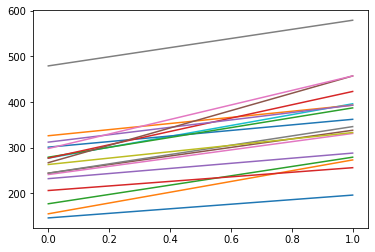

In [13]:
plt.plot(r18)
plt.show()

       0       1       2       3   ...      11       12      13      14
0  2000.0  2000.0  2000.0  2000.0  ...  371.66  2000.00  2000.0  2000.0
1  2000.0  2000.0  2000.0  2000.0  ...  280.69  1672.47  2000.0  2000.0
2  2000.0  2000.0  2000.0  2000.0  ...  322.76  1883.42  2000.0  2000.0
3  2000.0  2000.0  2000.0  2000.0  ...  305.20  2000.00  2000.0  2000.0
4  2000.0  2000.0  2000.0  2000.0  ...  296.79  2000.00  2000.0  2000.0
5  2000.0  2000.0  2000.0  2000.0  ...  300.96  2000.00  2000.0  2000.0
6  2000.0  2000.0  2000.0  2000.0  ...  280.69  1772.54  2000.0  2000.0
7  2000.0  2000.0  2000.0  2000.0  ...  296.79  1460.38  2000.0  2000.0
8  2000.0  2000.0  2000.0  2000.0  ...  393.52  1826.52  2000.0  2000.0

[9 rows x 15 columns]       0      1      2      3      4   ...     10     11     12     13     14
0  13.04  13.63  13.50  14.35  14.61  ...  11.35  10.17  13.96  13.24  15.98
1  11.67  12.13  10.96  10.24  10.89  ...  10.43   8.09  11.09  11.54  11.15
2   9.39   9.33   9.33   9

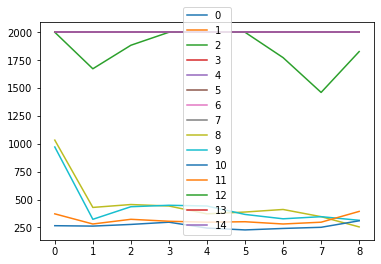

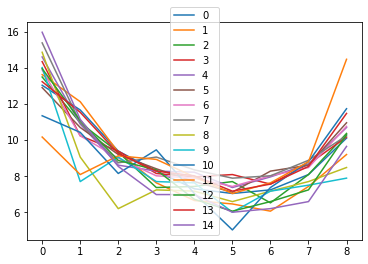

In [40]:
dfr=pd.DataFrame(r9)
dfr=dfr.T
dfv=pd.DataFrame(v9)
dfv=dfv.T
print(dfr, dfv)
dfr.plot()
dfv.plot()
plt.show()

% clear memory
clear;


%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
% sample data that were measured from actual 154kV power transmission lines

% a sample of insulator string that consists of seven insulators
r7 = [2000 2000 298.2 2000 2000 0 2000 2000 298.2];     % insulator resistance
v7 = [9.8 7.7 5.2 5.5 6.5 0 8.8 7.7 5.3];               % distribution voltage

% sample data of insulator strings that consist of eight insulators
r8 = [ % insulator resistance
     915.28 336.64 346.25 387.92 416.91 416.91 371.66 318.27;           % 1 Jeonju T/L Steel Tower no. 37
     2000 2000 2000 2000 1626.02 1943.48 1943.48 1626.02;               % 2 Jeonju T/L Steel Tower no. 37
     2000 1460.38 1499.03 2000 1581.72 1581.72 1230.69 1230.69;         % 3 Jeonju T/L Steel Tower no. 37
     2000 1289.88 1581.72 1387.92 1124.76 1289.88 1149.83 864.11;       % 4 Jeonju T/L Steel Tower no. 37
     ];
v8 = [ % distribution voltage
     13.63 9.33 7.37 7.17 6.78 5.54 6.85 7.04; 	                        % 1 Jeonju T/L Steel Tower no. 37
     17.28 10.17 8.87 7.3 6.46 5.93 6.13 6.72; 	                        % 2 Jeonju T/L Steel Tower no. 37
     18.39 9.52 8.35 6.91 6.13 6.2 5.93 6.33; 	                        % 3 Jeonju T/L Steel Tower no. 37
     18.06 9.26 8.15 6.85 5.93 5.8 5.87 5.74; 	                        % 4 Jeonju T/L Steel Tower no. 37
     ];

% sample data of insulator strings that consist of nine insulators
r9 = [ % insulator resistance
     2000 2000 2000 2000 2000 2000 2000 2000 2000;                      % 1 Namwon T/L Steel Tower no. 65
     2000 2000 2000 2000 2000 2000 2000 2000 2000;                      % 2 Namwon T/L Steel Tower no. 66
     2000 2000 2000 2000 2000 2000 2000 2000 2000;                      % 3 Imsil T/L Steel Tower no. 29
     2000 2000 2000 2000 2000 2000 2000 2000 2000;                      % 4 Imsil T/L Steel Tower no. 29
     2000 2000 2000 2000 2000 2000 2000 2000 2000;                      % 5 Imsil T/L Steel Tower no. 29
     2000 2000 2000 2000 2000 2000 2000 2000 2000;                      % 6 Imsil T/L Steel Tower no. 29
     2000 2000 2000 2000 2000 2000 2000 2000 2000;                      % 7 Imsil T/L Steel Tower no. 29
     2000 2000 2000 2000 2000 2000 2000 2000 2000;                      % 8 Imsil T/L Steel Tower no. 29
     1032.73 429.22 455.2 441.98 371.66 387.92 410.91 346.25 254.59;    % 9 Jeonju T/L Steel Tower no. 37
     971.25 322.76 435.54 448.53 441.98 366.42 327.31 346.25 313.85;    % 10 Jeonju T/L Steel Tower no. 37
     265.47 261.79 276.81 296.79 244.13 227.58 240.73 251.06 309.49;    % 11 Jeonju T/L Steel Tower no. 46-1
     371.66 280.69 322.76 305.2 296.79 300.96 280.69 296.79 393.52;     % 12 Jeonju T/L Steel Tower no. 59
     2000 1672.47 1883.42 2000 2000 2000 1772.54 1460.38 1826.52;       % 13 Jeonju T/L Steel Tower no. 46-1
     2000 2000 2000 2000 2000 2000 2000 2000 2000;                      % 14 Jeonju T/L Steel Tower no. 59
     2000 2000 2000 2000 2000 2000 2000 2000 2000;                      % 15 Jeonju T/L Steel Tower no. 63
     ];
v9 = [ % distribution voltage
     13.04 11.67 9.39 8.28 7.30 7.04 7.24 8.09 10.11;                   % 1 Namwon T/L Steel Tower no. 65
     13.63 12.13 9.33 7.63 6.65 6.46 6.06 7.43 9.20;                    % 2 Namwon T/L Steel Tower no. 66
     13.50 10.96 9.33 7.37 7.43 7.70 6.52 8.09 10.37;                   % 3 Imsil T/L Steel Tower no. 29
     14.35 10.24 9.39 8.15 7.96 8.09 7.56 8.67 10.17;                   % 4 Imsil T/L Steel Tower no. 29
     14.61 10.89 8.61 8.28 8.22 7.37 7.96 8.67 10.70;                   % 5 Imsil T/L Steel Tower no. 29
     12.91 10.70 9.20 8.41 7.70 7.11 8.28 8.61 10.96;                   % 6 Imsil T/L Steel Tower no. 29
     13.89 10.24 9.00 8.02 7.89 7.43 8.02 8.48 10.76;                   % 7 Imsil T/L Steel Tower no. 29
     15.39 10.96 8.74 9.06 8.35 7.89 8.02 8.88 10.24;                   % 8 Imsil T/L Steel Tower no. 29
     14.87 9.06 6.2 7.24 7.17 6.59 7.17 7.7 8.48;                       % 9 Jeonju T/L Steel Tower no. 37
     14.02 7.7 9.06 7.7 7.63 6 7.17 7.5 7.89; 	                        % 10 Jeonju T/L Steel Tower no. 37
     11.35 10.43 8.15 9.46 7.04 5.02 7.37 8.8 11.74;                    % 11 Jeonju T/L Steel Tower no. 46-1
     10.17 8.09 9.13 8.93 7.96 7.04 7.63 8.8 14.48;                     % 12 Jeonju T/L Steel Tower no. 59
     13.96 11.09 8.87 8.35 6.72 6.06 6.59 7.24 10.3;                    % 13 Jeonju T/L Steel Tower no. 46-1
     13.24 11.54 9.26 8.28 8.02 7.17 7.56 8.54 11.48;                   % 14 Jeonju T/L Steel Tower no. 59
     15.98 11.15 8.54 6.98 6.98 6 6.2 6.59 9.65;                        % 15 Jeonju T/L Steel Tower no. 63
     ];

% sample data of insulator strings that consist of ten insulators
% The numbers in the first parentheses denote insulation resistance values estimated from Distribution Voltage-based Diagnosis Algorithm
% The numbers in the second parentheses denote insulation resistance values estimated from Insulation Resistance-based Diagnosis Algorithm
r10 = [ % insulation resistance
     238.3 383.6 394.3 376.2 532 297.1 388.2 319.6 359 394.3; 		% 1 Gongduk T/L Steel Tower no. 5
     462.6 354.9 392.9 435.5 353.5 433.8 541.2 506.2 562.2 460.7; 	% 2 Gongduk T/L Steel Tower no. 5
     2000 2000 2000 2000 2000 2000 2000 2000 2000 2000; 		% 3 Gongduk T/L Steel Tower no. 81
     2000 2000 2000 2000 2000 2000 2000 2000 2000 2000; 		% 4 Gongduk T/L Steel Tower no. 81
     2000 2000 2000 2000 2000 2000 2000 2000 2000 2000; 		% 5 Gongduk T/L Steel Tower no. 81
     2000 2000 2000 2000 2000 2000 2000 2000 2000 2000; 		% 6 Gongduk T/L Steel Tower no. 81
     2000 2000 2000 2000 2000 2000 2000 2000 2000 2000; 		% 7 Gongduk T/L Steel Tower no. 81
     2000 2000 2000 2000 2000 2000 2000 2000 2000 2000; 		% 8 Gongduk T/L Steel Tower no. 81
     2000 2000 2000 2000 2000 2000 2000 2000 2000 2000; 		% 9 Gongduk T/L Steel Tower no. 81
     2000 2000 2000 2000 2000 2000 2000 2000 2000 2000; 		% 10 Gongduk T/L Steel Tower no. 81
     2000 2000 2000 2000 2000 2000 2000 2000 2000 2000; 		% 11 Gongduk T/L Steel Tower no. 72
     2000 2000 2000 2000 10.3 2000    0 2000 2000 2000; 		% 12 Gongduk T/L Steel Tower no. 72 - The 5th & 7th insulators are faulty; 5th, 7th - (0, 0) - (12.8750, 0)
     2000 2000 2000 2000 2000 2000 2000 2000 2000 2000; 		% 13 Gongduk T/L Steel Tower no. 72
     2000 2000 2000 2000 2000 2000 2000 2000 2000 2000; 		% 14 Gongduk T/L Steel Tower no. 72
     2000 2000 2000 2000 2000 2000 2000 2000 2000 2000; 		% 15 Gongduk T/L Steel Tower no. 72
     2000 2000 2000 2000 2000 2000 2000 2000 2000 2000; 		% 16 Gongduk T/L Steel Tower no. 72
     2000 2000 2000 2000 2.6  2000 2000 2000 2000 2000; 		% 17 Gongduk T/L Steel Tower no. 72 - The 5th is faulty; 5th - (0) - (3.2500)
     2000 2000 2000 2000 2000 2000 2000 2000 2000 2000; 		% 18 Gongduk T/L Steel Tower no. 72
     2000 2000 2000 2000 2000 2000 2000 2000 2000 2000; 		% 19 Gongduk T/L Steel Tower no. 72
     2000 2000 2000 2000 2000 2000 2000 2000 2000 2000; 		% 20 Gongduk T/L Steel Tower no. 72
     2000 2000 2000 2000 2000 2000 2000 2000 2000 2000; 		% 21 Gongduk T/L Steel Tower no. 72
     2000 2000 2000 2000 2000 2000 2000 2000 2000 2000; 		% 22 Gongduk T/L Steel Tower no. 72
     2000 2000 2000 2000 2000 2000 2000 2000 2000 2000; 		% 23 Namwon T/L Steel Tower no. 44
     2000 2000 2000 2000 2000 2000 2000 2000 2000 2000; 		% 24 Imsil T/L Steel Tower no. 31
     2000 2000 2000 2000 2000 2000 2000 2000 2000 2000; 		% 25 Imsil T/L Steel Tower no. 31
     2000 2000 2000 2000 2000 2000 2000 2000 2000 2000; 		% 26 Imsil T/L Steel Tower no. 31
     2000 2000 2000 2000 2000 2000 2000 2000 2000 2000; 		% 27 Imsil T/L Steel Tower no. 31
     2000 2000 2000 2000 2000 2000 2000 2000 2000 2000; 		% 28 Imsil T/L Steel Tower no. 31
     2000 2000 2000 2000 2000 2000 2000 2000 2000 2000; 		% 29 Imsil T/L Steel Tower no. 31
     2000 2000 2000 2000 2000 2000 2000 2000 2000 2000; 		% 30 Imsil T/L Steel Tower no. 18
     2000 2000 2000 2000 2000 2000 2000 2000 2000 2000; 		% 31 Imsil T/L Steel Tower no. 18
     2000 2000 2000 2000 2000 2000 2000 2000 2000 2000; 		% 32 Imsil T/L Steel Tower no. 18
     2000 2000 2000 2000 2000 2000 2000 2000 2000 2000; 		% 33 Imsil T/L Steel Tower no. 18
     2000 2000 2000 2000 2000 2000 2000 2000 2000 2000; 		% 34 Imsil T/L Steel Tower no. 18
     2000 2000 2000 2000 2000 2000 2000 2000 2.94 2000; 		% 35 Namwon T/L Steel Tower no. 59 - The 9th is faulty; 9th - (9.0094) - (3.6750)
     2000 2000 1.93 2000 2000 2000 2000 2000 2000 2000; 		% 36 Imsil T/L Steel Tower no. 20 - The 3rd is faulty; 3rd - (281.9587) - (2.4125)
     272.98 305.2 309.49 322.76 356.17 361.25 361.25 309.49 356.17 399.22;      % 37 Jeonju T/L Steel Tower no. 23
     125.29 261.79 240.73 261.79 254.59 254.59 272.98 288.63 261.79 387.92;     % 38 Jeonju T/L Steel Tower no. 23
     2000 218.15 194.63 165.7 206.1 206.1 218.15 227.58 247.57 382.41;          % 39 Jeonju T/L Steel Tower no. 23
     81.61 96.84 95.09 86.55 89.92 95.09 98.61 73.68 78.4 121.25;               % 40 Jeonju T/L Steel Tower no. 23
     51.83 78.4 75.24 70.6 72.13 73.68 69.08 78.4 70.6 115.34;                  % 41 Jeonju T/L Steel Tower no. 23
     73.68 76.81 70.6 73.68 78.4 91.62 107.73 104.03 70.6 98.61;                % 42 Jeonju T/L Steel Tower no. 23
     278.62 305.2 292.68 356.17 272.98 292.68 300.96 265.47 265.47 366.42;      % 43 Jeonju T/L Steel Tower no. 28
     405.02 521.25 468.92 572.32 429.22 441.98 2.94 685.11 490.49 880.67;       % 44 Jeonju T/L Steel Tower no. 35 - The 7th is faulty; 7th - (6.6464) - (16.1631)
     376.99 313.85 336.64 327.31 327.31 313.85 265.47 313.85 284.63 1353.91;    % 45 Jeonju T/L Steel Tower no. 37
     346.25 346.25 371.66 346.25 313.85 376.99 346.25 361.25 429.22 1626.02;    % 46 Jeonju T/L Steel Tower no. 37
     254.59 2000 212.05 261.79 189.09 265.47 258.17 212.05 269.2 258.17;        % 47 Jeonju T/L Steel Tower no. 38
     346.25 322.76 341.41 292.68 212.05 341.41 331.94 371.66 416.91 1149.83;    % 48 Jeonju T/L Steel Tower no. 39
     2000 462 410.91 546 513.33 393.52 600.38 685.11 817.14 1581.72;            % 49 Jeonju T/L Steel Tower no. 41
     455.2 429.22 393.52 416.91 313.85 322.76 318.27 276.81 272.98 455.2;       % 50 Jeonju T/L Steel Tower no. 23
     237.38 288.63 296.79 254.59 251.06 230.81 224.4 269.2 244.13 462;          % 51 Jeonju T/L Steel Tower no. 23
     537.58 483.16 331.94 448.53 423.01 399.22 382.41 341.41 296.79 600.38;     % 52 Jeonju T/L Steel Tower no. 23
     1581.72 1032.73 971.25 1054.59 864.11 1011.58 1175.8 802.34 733.91 1826.52;% 53 Jeonju T/L Steel Tower no. 28
     1826.52 2000 1772.54 2000 1826.52 2000 36.21 2000 2000 2000;               % 54 Jeonju T/L Steel Tower no. 35 - The 7th is faulty; 7th - (5.3918) - (45.9829)
     1289.88 1032.73 1124.76 864.11 760.22 662.43 546 554.59 620.13 2000;       % 55 Jeonju T/L Steel Tower no. 37
     2000 2000 2000 2000 2000 2000 1626.02 1626.02 1175.8 1539.44;              % 56 Jeonju T/L Steel Tower no. 38
     2000 2000 2000 2000 2000 2000 2000 2000 2000 2000;                         % 57 Jeonju T/L Steel Tower no. 39
     2000 2000 2000 2000 2000 2000 2000 2000 2000 2000;                         % 58 Jeonju T/L Steel Tower no. 41
     182.12 214.29 244.09 285.71 315.79 277.67 285.71 258.5 266.01 392.25;      % 59 Hamyeol T/L Steel Tower no. 36
     205.08 247.62 258.5 258.5 285.71 269.84 285.71 306.88 269.84 359.45;       % 60 Hamyeol T/L Steel Tower no. 36
     196.21 208.11 214.29 230.41 244.09 233.77 262.23 244.09 262.23 375.44;     % 61 Hamyeol T/L Steel Tower no. 36
     233.77 187.66 205.08 220.61 199.13 208.11 247.62 240.6 227.11 370.02;      % 62 Hamyeol T/L Steel Tower no. 36
     139.82 196.21 190.48 205.08 187.66 199.13 214.29 230.41 220.61 254.83;     % 63 Hamyeol T/L Steel Tower no. 36
     230.41 220.61 247.62 277.67 244.09 262.23 289.83 306.88 273.73 386.55;     % 64 Hamyeol T/L Steel Tower no. 36
     873.71 311.3 403.94 398.05 506.36 613.16 375.44 506.36 469 556.39;         % 65 Hamyeol T/L Steel Tower no. 49
     461.95 298.23 294 320.35 354.29 441.56 262.23 403.94 254.83 302.52;        % 66 Hamyeol T/L Steel Tower no. 49
     435.01 285.71 306.88 386.55 435.01 441.56 370.02 403.94 359.45 392.25;     % 67 Hamyeol T/L Steel Tower no. 49
     623.38 344.21 344.21 344.21 359.45 380.95 311.3 416.04 380.95 285.71;      % 68 Hamyeol T/L Steel Tower no. 49
     689.9 364.69 386.55 364.69 409.94 483.52 469 392.25 344.21 398.05;         % 69 Hamyeol T/L Steel Tower no. 49
     666.67 364.69 422.25 392.25 461.95 398.05 483.52 422.25 386.55 530.61;     % 70 Hamyeol T/L Steel Tower no. 49
     2000 2000 2000 2000 2.03 2000 1819.55 9.49 2000 2000;                      % 71 Shingyeryongeunjin T/L Tower no. 61 - The 5th & 8th insulators are faulty; 5th, 8th - (15.6374, 5.9727) - (2.5684, 12.1176)
     ];
 v10 = [ % distribution voltage
     13.84 12.79 10.69 9.54 6.94 7.32 7.26 5.99 6.94 7.67;                      % 1 Gongduk T/L Steel Tower no. 5
     13.58 10.73 9.91 8.31 8.15 7.28 6.72 6.86 7.79 9.66;                       % 2 Gongduk T/L Steel Tower no. 5
     15.76 10.39 10.13 8.01 8.29 7.51 6.91 6.69 7.10 8.20;                      % 3 Gongduk T/L Steel Tower no. 81
     14.85 10.47 9.73 8.52 7.72 7.54 7.22 6.85 7.45 8.66;                       % 4 Gongduk T/L Steel Tower no. 81
     15.16 10.02 9.92 8.87 8.04 7.17 7.08 6.89 6.62 9.24;                       % 5 Gongduk T/L Steel Tower no. 81
     15.29 9.86 8.82 8.58 7.50 7.69 7.12 7.50 8.25 8.40;                        % 6 Gongduk T/L Steel Tower no. 81
     15.63 10.24 9.71 8.80 7.36 7.64 7.55 7.55 6.11 8.41;                       % 7 Gongduk T/L Steel Tower no. 81
     14.87 9.89 8.87 7.83 8.35 8.25 7.50 7.69 7.41 8.35;                        % 8 Gongduk T/L Steel Tower no. 81
     15.69 9.99 9.76 8.59 7.64 7.91 7.14 7.19 6.78 8.32;                        % 9 Gongduk T/L Steel Tower no. 81
     14.03 10.19 9.72 8.94 7.64 7.23 7.55 6.99 7.83 8.89;                       % 10 Gongduk T/L Steel Tower no. 81
     16.59 12.11 9.41 8.14 7.27 6.90 6.70 6.90 6.98 8.01;                       % 11 Gongduk T/L Steel Tower no. 72
     15.75 12.10 11.43 10.64 0.00 10.10 0.00 9.31 9.39 10.27;                   % 12 Gongduk T/L Steel Tower no. 72 - The 5th & 7th insulators are faulty
     16.25 12.19 9.67 8.57 7.39 7.06 6.82 6.46 6.99 7.60;                       % 13 Gongduk T/L Steel Tower no. 72
     14.65 10.65 9.24 8.12 7.39 7.64 7.43 7.26 7.78 8.85;                       % 14 Gongduk T/L Steel Tower no. 72
     16.00 11.75 9.51 7.94 7.32 7.57 6.66 6.74 7.24 8.27;                       % 15 Gongduk T/L Steel Tower no. 72
     13.93 11.22 9.26 8.54 7.65 6.88 6.88 7.22 8.11 9.30;                       % 16 Gongduk T/L Steel Tower no. 72
     15.58 12.32 10.36 9.95 0.00 9.02 7.71 7.54 7.95 8.56;                      % 17 Gongduk T/L Steel Tower no. 72 - The 5th is faulty
     12.96 10.61 9.58 8.46 7.76 7.35 7.80 7.51 8.09 8.88;                       % 18 Gongduk T/L Steel Tower no. 72
     14.40 11.02 9.48 8.47 7.95 7.50 7.18 7.10 7.63 8.27;                       % 19 Gongduk T/L Steel Tower no. 72
     13.12 10.95 10.09 9.24 8.44 7.75 7.92 7.83 7.11 6.56;                      % 20 Gongduk T/L Steel Tower no. 72
     12.51 11.15 9.52 8.79 8.40 7.70 7.24 7.67 7.70 8.33;                       % 21 Gongduk T/L Steel Tower no. 72
     12.87 10.76 9.58 8.73 8.33 7.55 7.39 7.47 7.88 8.44;                       % 22 Gongduk T/L Steel Tower no. 72
     13.37 10.70 8.87 7.56 6.72 5.87 5.74 6.13 7.04 8.54;                       % 23 Namwon T/L Steel Tower no. 44
     13.30 10.37 8.93 7.37 6.46 5.67 6.20 6.00 7.37 8.74;                       % 24 Imsil T/L Steel Tower no. 31
     14.09 9.85 8.54 8.15 7.04 6.85 6.59 6.72 7.04 9.13;                        % 25 Imsil T/L Steel Tower no. 31
     12.06 9.78 9.06 8.67 6.91 6.85 7.24 6.98 8.09 9.52;                        % 26 Imsil T/L Steel Tower no. 31
     12.98 9.85 9.26 8.09 7.04 6.78 6.59 6.33 7.11 10.24;                       % 27 Imsil T/L Steel Tower no. 31
     12.06 10.76 10.11 7.43 6.85 7.24 6.65 7.04 7.43 9.33;                      % 28 Imsil T/L Steel Tower no. 31
     13.30 11.35 9.20 8.09 6.91 6.52 7.30 6.78 7.24 9.33;                       % 29 Imsil T/L Steel Tower no. 31
     13.17 10.56 8.87 7.70 7.17 6.78 6.78 6.91 7.70 9.78;                       % 30 Imsil T/L Steel Tower no. 18
     13.76 10.37 8.67 7.63 7.17 6.85 6.72 7.24 8.22 10.43;                      % 31 Imsil T/L Steel Tower no. 18
     15.52 12.46 9.52 8.35 7.11 6.52 6.39 6.33 7.70 9.91;                       % 32 Imsil T/L Steel Tower no. 18
     12.52 10.37 8.87 7.56 6.98 6.52 6.39 6.65 7.17 9.33;                       % 33 Imsil T/L Steel Tower no. 18
     12.91 10.30 8.74 7.56 6.85 6.52 6.39 6.91 7.76 10.17;                      % 34 Imsil T/L Steel Tower no. 18
     15.59 11.15 9.06 7.43 6.39 6.13 6.33 7.56 1.11 9.91;                       % 35 Namwon T/L Steel Tower no. 59 - The 9th is faulty
     16.5 14.22 6.91 9.91 8.41 6.72 7.37 6.52 7.56 10.04;                       % 36 Imsil T/L Steel Tower no. 20 - The 3rd is faulty
     8.74 9.06 7.43 6.91 7.7 6.65 6.72 5.67 7.04 9.91;                          % 37 Jeonju T/L Steel Tower no. 23
     6.13 9.26 7.56 6.2 7.04 6.72 6.85 7.37 6.78 11.41;                         % 38 Jeonju T/L Steel Tower no. 23
     10.89 8.93 7.5 7.11 6 6.06 6.59 7.56 7.56 10.83;                           % 39 Jeonju T/L Steel Tower no. 23
     8.02 8.15 6.91 6.46 6.46 6.2 6.33 5.41 6.85 10.43;                         % 40 Jeonju T/L Steel Tower no. 23
     8.8 8.48 7.11 6 6.46 6.26 6.13 6.91 6.59 11.8;                             % 41 Jeonju T/L Steel Tower no. 23
     10.5 8.15 6.98 6.72 5.74 5.87 6.52 8.41 7.63 11.02;                        % 42 Jeonju T/L Steel Tower no. 23
     15.91 8.15 8.02 7.24 7.04 6 7.04 6.72 7.43 10.5;                           % 43 Jeonju T/L Steel Tower no. 28
     9.72 9.65 9.33 9.33 7.96 7.89 0.78 7.76 7.43 10.96;                        % 44 Jeonju T/L Steel Tower no. 35 - The 7th is faulty
     10.63 8.54 8.54 7.96 6.85 6.33 6.06 6.33 5.02 10.04;                       % 45 Jeonju T/L Steel Tower no. 37
     9.78 8.02 6.98 7.5 6.06 6.52 5.41 6.13 6.72 11.35;                         % 46 Jeonju T/L Steel Tower no. 37
     10.56 8.41 6.85 7.43 6.46 5.8 7.24 5.41 7.43 10.63;                        % 47 Jeonju T/L Steel Tower no. 38
     9.98 8.15 7.96 6.65 6.72 6.91 6.78 6.91 8.02 10.76;                        % 48 Jeonju T/L Steel Tower no. 39
     6.85 10.24 7.5 8.74 5.02 5.67 5.61 6.52 7.56 10.37;                        % 49 Jeonju T/L Steel Tower no. 41
     9.98 9.33 8.02 7.37 6.33 6.52 6.06 6.13 6.13 9.78;                         % 50 Jeonju T/L Steel Tower no. 23
     10.3 8.74 7.76 6.78 6.72 6.26 6.06 6.46 7.24 11.15;                        % 51 Jeonju T/L Steel Tower no. 23
     11.67 10.11 8.67 7.37 6.33 6.33 6.39 6.65 6.98 11.41;                      % 52 Jeonju T/L Steel Tower no. 23
     10.7 9.26 8.09 6.98 6.78 6.52 6.78 6.52 6.33 9.65;                         % 53 Jeonju T/L Steel Tower no. 28
     11.87 10.43 9 8.93 7.7 8.41 0.59 6.98 7.11 9.59;                           % 54 Jeonju T/L Steel Tower no. 35 - The 7th is faulty
     11.74 9.13 7.89 6.72 7.17 6.33 5.61 5.15 5.67 9.06;                        % 55 Jeonju T/L Steel Tower no. 37
     13.96 9.65 7.89 6.91 6.39 5.67 5.8 6.2 6.72 9.65;                          % 56 Jeonju T/L Steel Tower no. 38
     12.78 9.65 8.54 7.3 6.33 6.26 6.06 5.93 6.72 9.26;                         % 57 Jeonju T/L Steel Tower no. 39
     12.26 10.83 9.46 7.7 6.85 6.46 6.13 6.13 6.72 8.48;                        % 58 Jeonju T/L Steel Tower no. 41
     9.33 9.33 8.74 8.74 7.37 8.02 7.56 8.02 8.28 10.76;                        % 59 Hamyeol T/L Steel Tower no. 36
     9.59 9.78 8.35 8.22 7.89 7.5 7.63 8.09 8.22 11.02;                         % 60 Hamyeol T/L Steel Tower no. 36
     9.26 9.72 8.67 8.02 7.43 7.3 7.43 7.83 8.15 10.7;                          % 61 Hamyeol T/L Steel Tower no. 36
     6.13 9.72 8.74 8.22 7.56 7.5 8.02 7.7 8.15 10.76;                          % 62 Hamyeol T/L Steel Tower no. 36
     9.26 9.91 8.74 7.89 7.5 7.24 6.98 7.83 7.5 10.17;                          % 63 Hamyeol T/L Steel Tower no. 36
     9.78 9.52 8.93 8.41 7.76 7.11 6.91 7.11 7.5 9.72;                          % 64 Hamyeol T/L Steel Tower no. 36
     11.35 9.13 8.61 6.98 6.98 7.56 6.72 6.46 7.11 9.13;                        % 65 Hamyeol T/L Steel Tower no. 49
     11.28 9.59 8.48 7.76 6.78 7.5 6.78 7.24 7.37 9.2;                          % 66 Hamyeol T/L Steel Tower no. 49
     10.3 8.67 8.15 7.89 7.3 7.11 7.04 7.5 7.89 10.5;                           % 67 Hamyeol T/L Steel Tower no. 49
     10.7 9.46 7.96 7.96 7.43 7.43 7.3 7.37 8.02 9.98;                          % 68 Hamyeol T/L Steel Tower no. 49
     10.89 9.46 8.67 7.76 7.17 7.37 7.04 7.89 7.96 10.43;                       % 69 Hamyeol T/L Steel Tower no. 49
     10.7 9.52 8.48 7.76 7.96 6.72 7.04 7.5 7.89 10.63;                         % 70 Hamyeol T/L Steel Tower no. 49
     13.56 11.09 9.46 10.17 2.09 9.46 9.2 0.85 9.52 12.65;                      % 71 Shingyeryongeunjin T/L Tower no. 61 - The 5th & 8th insulators are faulty
     ];

 % sample data of insulator strings that consist of eleven insulators
 r11 = [ % insulation resistance
     2000 2000 2000 2000 2000 2000 2000 12.1 2000 2000 2000;                    % 1 Gongduk T/L Steel Tower no. 72 - The 8th is faulty; 8th - (0) - (15.1250)
     2000 2000 2000 2000 2000 2000 2000 2000 12.1 2000 2000;                    % 2 Gongduk T/L Steel Tower no. 72 - The 9th is faulty; 9th - (0) - (15.1250)
     2000 2000 2000 2000 2000 2000 2000 2000 2000 2000 2000;                    % 3 Gongduk T/L Steel Tower no. 72
     2000 2000 2000 2000 2000 2000 2000 2000 2000 2000 2000;                    % 4 Gongduk T/L Steel Tower no. 72
     2000 2000 2000 2000 2000 2000    0 2000 2000 2000 2000;                    % 5 Gongduk T/L Steel Tower no. 72 - The 7th is faulty; 7th - (0) - (0)
     2000 2000 2000 2000 2000 2000 2000 2000 2000 2000 2000;                    % 6 Gongduk T/L Steel Tower no. 72
     2000 2000 2000 2000 2000 2000 2000 2000 2000 2000 2000;                    % 7 Gongduk T/L Steel Tower no. 72
     2000 2000 2000 2000 2000 2000 2000 2000 2000 2000 2000;                    % 8 Gongduk T/L Steel Tower no. 72
     2000 2000 2000 2000 2000 2000 2000 2000 2000 2000 2000;                    % 9 Gongduk T/L Steel Tower no. 72
     2000 2000 2000 2000 2000 2000 2000 2000 2000 2000 2000;                    % 10 Gongduk T/L Steel Tower no. 72
     2000 2000 2000 2000 2000 2000 2000 2000 2000 2000 2000;                    % 11 Gongduk T/L Steel Tower no. 72
     2000 2000 2000 2000 2000 2000 2000 2000 2000 2000 2000;                    % 12 Gongduk T/L Steel Tower no. 72
    ];
v11 = [ % distribution voltage
     15.63 12.12 9.40 8.37 7.84 7.14 7.05 0.00 7.05 6.84 7.54;                  % 1 Gongduk T/L Steel Tower no. 72 - The 8th is faulty
     14.70 11.31 9.03 7.95 7.42 6.96 6.83 7.37 0.00 8.28 9.15;                  % 2 Gongduk T/L Steel Tower no. 72 - The 9th is faulty
     16.22 11.87 9.54 7.93 6.92 6.16 5.99 5.71 5.75 6.12 6.80;                  % 3 Gongduk T/L Steel Tower no. 72
     13.90 10.57 8.70 7.75 6.89 6.67 6.19 6.41 6.58 6.97 8.36;                  % 4 Gongduk T/L Steel Tower no. 72
     15.70 11.67 9.18 8.01 7.52 7.26 0.00 7.06 6.93 7.48 8.18;                  % 5 Gongduk T/L Steel Tower no. 72 - The 7th is faulty
     13.67 10.53 8.66 7.75 6.80 6.32 6.18 6.44 6.80 7.36 8.49;                  % 6 Gongduk T/L Steel Tower no. 72
     13.86 10.16 8.80 7.76 7.43 7.05 6.68 6.43 6.55 6.64 7.63;                  % 7 Gongduk T/L Steel Tower no. 72
     12.20 10.34 9.26 7.83 7.18 6.79 6.75 6.71 6.88 7.22 7.83;                  % 8 Gongduk T/L Steel Tower no. 72
     14.22 10.75 9.10 8.23 7.41 6.79 6.39 6.19 6.31 6.55 7.06;                  % 9 Gongduk T/L Steel Tower no. 72
     12.70 10.21 8.84 8.22 7.59 7.10 6.31 6.43 6.60 6.93 8.09;                  % 10 Gongduk T/L Steel Tower no. 72
     13.74 11.06 8.89 8.35 7.36 6.93 6.53 6.10 6.30 6.34 7.40;                  % 11 Gongduk T/L Steel Tower no. 72
     12.97 10.38 9.31 8.37 6.85 6.15 7.02 6.41 6.15 7.18 8.20;                  % 12 Gongduk T/L Steel Tower no. 72
    ];

 % sample data of insulator strings that consist of twelve insulators
r12 = [2000 267 2000 2000 316.8 2000 263.2 4 2000 2000 2000 2000];     % insulator resistance
v12 = [10 8 7.8 9.1 7.5 7.6 8 2 7.7 9.6 7.8 8.9];                      % distribution voltage

% sample data of insulator strings that were measured from 154kV Haenam-Jindo T/L,Shingangjin-Haenam T/L in 2010
r10h = [ % insulation resistance
    129.9	41.7	40.2	27.7	22.4	33.1	30.4	27.7	12.3	43.1;
    2000	475.1	482.6	482.6	467.8	66.2	594.8	566.1	636.1	705.9;
    2000	2000	2000	2000	2000	2000	2000	2000	2000	316.6;
    2000	2000	2000	2000	1868	2.2	2000	2000	2000	2000;
    136	401.5	351	361.6	460.6	367	467.8	460.6	383.8	453.5;
    6.1	2000	2000	2000	2000	2000	2000	2000	2000	2000;
    32.2	2000	2000	2000	2000	2000	2000	2000	2000	2000;
    2000	2000	1663.4	47	2000	2000	2000	2000	47	2000;
    2000	2000	2000	2000	2000	2000	2000	2000	188.4	2000;
    2000	2000	1451.4	545.6	2000	2000	2000	2000	2000	2000;
    1140.8	2000	2000	2000	2000	2000	40.1	2000	1997.9	2000;
    2000	2000	4.1	2000	2000	2000	2000	22.3	2000	2000;
    2000	2000	2000	2000	2000	2000	2000	40.1	2000	2000;
    2000	2000	2000	2000	131.1	2000	2000	72.6	2000	57.1;
    2000	2000	793.3	2000	2000	2000	2000	2000	2000	2000;
    106.3	2000	69.4	2000	2000	80.9	2000	2000	2000	2000;
    2000	2000	2000	2000	2000	2000	2000	80.9	1997.9	2000;
    1068.2	2000	2000	2000	2.1	2000	2000	2000	2000	2000;
    235.1	9.6	2000	2000	2000	2000	2000	2000	2000	2000;
    2000	2000	2000	2000	2000	2000	2000	2000	15.3	2000;
    14.1	1712.2	2000	100.6	2000	2000	2000	2000	2000	2000;
    2000	2000	2000	2000	1572.7	2000	2000	11.9	256.4	249.1;
    11.9	11.9	2000	3.1	2000	2000	2000	2000	2000	2000;
    1023.7	2000	2000	2.1	2000	2000	2000	2000	2000	2000;
    2000	2000	2000	2000	2000	2000	2000	2000	2000	74.2;
    49.8	2000	2000	2000	2000	2000	2000	2000	2000	2000;
    2000	2000	4.1	2000	2000	2000	2000	2000	2000	2000;
    277.3	1928.1	2000	2000	2000	250.1	2000	2000	2000	2000;
    1160.4	2000	2000	2000	2000	2000	2000	92.4	2000	2000;
    2000	2000	2000	2000	2000	8.9	2000	2000	2000	2000;
    2000	1814.4	398.7	90	2000	2000	2000	2000	2000	2000;
    2000	2000	2000	2000	2000	2000	3.2	2000	2000	2000;
    2000	48.1	2000	2000	2000	2000	2000	2000	2000	2000;
    84.7	2000	2000	72.7	2000	2000	2000	2000	2000	2000;
    2000	86.4	2000	14.4	2000	2000	2000	2000	2000	2000;
    51	2000	2000	2000	119.3	748.1	179.7	2000	2000	2000;
    2000	2000	2000	2000	2000	2000	2000	1.1	2000	2000;
    2000	2000	7.2	2000	2000	1.1	2000	2000	48.1	2000;
];

v10h = [ % distribution voltage
    9.8	8.4	8	6.3	5.6	6.3	7	6.8	3.4	7;
    1.6	12	7.5	8.4	8.2	4.2	7.2	6.9	7.7	9.3;
    11.2	11.2	9.7	8.9	8.3	7.3	7.5	7.4	8.5	7.5;
    14.7	11	9.1	7.8	7	2.3	6	5.9	7.2	8.6;
    6.8	12.3	9.2	7	6.5	5.7	6.3	5.8	6.3	9.6;
    7	14.2	11	10.4	9.3	8.3	7.6	8	8.5	8.3;
    7.6	12.7	11.2	9.9	8.1	8	7.6	8.1	8.3	10.6;
    16	15.7	12.8	4.2	9.7	8.9	8.9	9.5	5.2	11.3;
    11	11	10.2	8.3	7.8	7.6	7.3	8	5.9	9.7;
    12.8	12.8	7.9	6	9.3	6.3	6.7	6.8	7.6	10.1;
    9.3	9	9.9	8.6	9.5	9.2	3.2	6.8	5.6	11.1;
    14.2	14.3	3.7	11.1	7.6	9	9	0.7	9.9	9.8;
    14.2	11.5	9.7	8.7	7.7	7.5	5.8	3.2	7.3	12.1;
    15.2	12.1	10.2	9.8	5.1	7.9	8.8	5.2	10.3	5.5;
    13.4	13.6	4.6	7.7	6.5	6.1	5.9	6.7	5.5	9.7;
    6.5	15.9	4.2	8.2	8.5	1.8	7.4	6.5	8.4	10.4;
    14.9	11	9.4	8.2	7.4	7.8	8.5	0.6	6.3	10.7;
    7.7	11.2	10.6	10	2.9	8.5	7.8	7.8	8.3	10.4;
    12.4	3.7	11.8	10.3	9.2	8.3	6.1	7.5	8.4	8.5;
    13.7	11.2	8.8	7.7	6.7	5.5	4.4	6.5	2	9.2;
    3.3	14.3	11.3	6.5	7.7	7.5	6.6	6.5	7.6	9.8;
    17.3	12.3	11.7	11.3	8.2	10.2	12.8	3.5	6.5	6.7;
    3.7	3.6	13.6	4.2	10.4	9.5	8.8	8	8.2	8.2;
    14.7	12.3	10.2	3.3	8.2	7.1	6.7	7.3	8.2	10.5;
    14	10.5	8.9	7.7	6.5	5.3	5.7	5.7	7.4	6.1;
    7.2	13.1	10.8	9	7.4	6.5	6.1	6.3	7.2	7.2;
    16.2	14	4	9.8	8.5	7.4	7.2	7.2	7.5	7.5;
    10	11	10.4	8.9	8.1	1.8	6.1	6.4	7.7	0.8;
    11.1	11.2	9.4	8.2	6.5	6.4	7.5	3.4	7.5	9.3;
    14.2	10.5	9.1	7.7	5.9	1.6	5.6	6.3	7.2	9.4;
    16.7	12.7	4	3.6	7.6	7	6.7	7.1	8.2	10.5;
    13.2	10.9	9.1	7.2	6.7	6.7	1.2	6.1	7.2	8;
    16	4.2	9.3	7.7	6.1	5.5	5.3	5.5	6.5	8.4;
    5.6	14	9.8	4	7.8	7.4	7	5.9	8.1	10.4;
    15.3	5.6	9.8	3.2	8.3	7.6	6.8	7	8.3	10.7;
    9.6	14.7	8.7	11	4.6	6.2	3.3	6.9	7.8	9.8;
    13.5	10.4	9	7.4	6.3	6.1	6.7	0.6	6.9	4.8;
    15.6	13.7	6	10	8.8	2.5	7.6	8.2	0.9	4.8;
];

r11h = [ % insulation resistance
    228.8	225.4	261.4	273.3	269.3	269.3	265.3	281.4	19.6	225.4	311.9;
    2000	2000	2000	2000	2000	2000	15.3	2000	2000	2000	2000;
    58.6	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000;
    865.3	2000	2000	2000	2000	2000	2000	98	2000	2000	53.7;
    955.9	975.7	1483.7	66.2	1705.9	1757.2	1483.7	1757.2	1705.9	2000	2000;
    787	758.5	772.5	1109.4	1160.4	59.9	1017.4	1160.4	1372.5	1372.5	2000
    848.7	1187.4	39.2	1244.3	1566.3	1610.6	1566.3	1657.1	1928.1	2000	2000;
    468.9	290.9	299.6	299.6	336.9	347	336.9	327.1	327.1	266.4	17;
    14.7	476.2	99.1	188.9	558	531.7	567.2	531.7	491.3	427.7	531.7;
    37.5	82.5	883.4	28.2	1086.3	1086.3	1525.1	1567.4	2000	1929.2	1707;  % 2번애자 불량 잡기가 쉽지 않음
    36.2	2000	2000	144.1	2000	2000	2000	2000	2000	2000	2000;
    434.2	670.8	605.8	586.1	523.3	670.8	531.7	576.5	616.1	719.6	0;
    2000	2000	2000	2000	2000	69.8	2000	2000	2000	2000	2000;
    2000	2000	57.6	2000	2000	2000	89.9	2000	2000	2000	2000;
    2000	2000	2000	202.1	2000	2000	2000	2000	2000	2000	2000;

];

v11h = [ % distribution voltage
    9.3	9.3	8.2	7.7	6.8	6.4	5.9	6.6	2.5	6.9	9;
    13.9	10.6	9.1	7.7	6.4	5.7	1.6	5	5.5	5.9	3.5;
    6.3	12.5	10.2	8.1	6.6	5.8	5.2	4.8	5	4.8	4.5;
    12.5	11.3	9.4	8.2	6.5	6.3	7.4	3.2	7.4	9.3	6.5;
    12.7	12.4	10.4	3.6	7.2	6	5.8	5.4	5.2	6.2	8.3;
    12.2	10.5	9.1	8.8	7.2	2.9	6	4.7	5.3	5.5	7;
    14.2	12.2	2.5	8.3	6.3	5.7	5	4.8	5.1	5.4	7;
    13.7	11.2	8.2	7.2	6.8	6	5.5	5.2	6.8	7.8	3.7;
    5.3	14.3	6.3	8	7.5	6.8	6	6.1	6.5	6.5	10.1;
    6.1	8	12	2.3	8	6.4	5.7	5.7	5.7	6.7	8.4;
    6.2	12.6	10.6	4.7	5.4	5.7	4.8	4.7	4.6	5.6	7.4;
    14.4	12.2	8.4	7	6.3	5.2	5.3	5.3	5.6	6.9	2;
    14.5	11.6	9.5	7.9	7	0.5	5.2	4.8	4.9	5.5	7.3;
    14.2	12.3	3.5	8.2	7	6.2	3.8	5.3	5.4	6.4	8.7;
    13.5	11.5	9.7	5.6	6.3	5.2	5	4.7	5.1	5.5	5.6;

];

r12h = [ % insulation resistance
    1111.5	683.6	720.7	596.9	695.7	671.9	649.2	683.6	568.2	587.2	774.7	0;
    2000	2000	5	2000	2000	2000	2000	76.3	63.6	2000	2000	2000;
    139.8	144.4	151.4	469	2000	40.8	2000	2000	2000	2000	2000	1;

];

v12h = [ % distribution voltage
    15.1	11	9.1	6.7	6.1	5.7	5.5	5.3	5.5	6.5	8	3.4;
    15	12.1	6.2	8.9	7.4	6.1	6.3	2.2	1.3	3.2	6.1	8.1;
    9.5	9.5	7.4	6.5	9.5	1.6	7	6.8	7	7.8	10.1	3.7;

];

r13h = [ % insulation resistance
    492.3	287.7	110	237.8	271.4	252.2	283.6	244.9	318.7	318.7	292	292	11.1;
];

v13h = [ % distribution voltage
    14.3	10.7	6.5	6.8	6.2	5	4.9	4.5	5.3	4.9	6.1	7.1	3.5;
];

% sample data measured from 154kV Dongjinju T/L in 2011
r10s = [ % insulation resistance
    87	79	97	78	110	79	93	96	80	169;
    56	68	65	63	74	80	70	74	80	122;
    60	72	84	77	71	114	82	85	91	62;
    1300	1621	646	669	1048	5	619	899	1183	2000;
    1332	1742	687	758	1157	5	658	974	1225	2000;
    1300	1621	687	718	1094	6	630	917	1197	2000;
    249	331	249	287	271	261	240	298	211	394;
];

v10s = [ % distribution voltage
    7.2	5.8	5.9	5.2	5.9	5.6	5.2	5.8	5.4	7.6;
    6	      5.6	5.9	5.9	5.4	5.9	5.2	5.9	6	8.4;
    5.4	5.1	5.9	4.8	4.7	6.3	5.2	5.5	6.9	8.1;
    9.6	7.8	7	6.8	6.7	0.4	5.9	5.9	6.3	8.3;
    9.6	7.6	7.1	6.8	6.7	0.4	6	6	6.3	8.6;
    9.7	7.8	7	6.8	6.8	0.4	6	6	6.5	8.6;
    9.9	8.9	5.6	6.3	5.3	5.6	4.7	5.1	6.1	8.5;
];

r11s = [ % insulation resistance
    296	1254	1475	604	652	890	6	538	724	984	2000;
];

v11s = [ % distribution voltage
    99.3	9.6	7.6	7	6.8	6.7	0.4	5.9	5.8	6.3	8.5;
];


%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
% sample data that were measured from actual 345kV power transmission lines

% sample data measured from 345kV Shinonyang-SeoSeoul T/L in 2011 - 8번째, 22번째 수신 불량 발생
r16 = [ % insulation resistance
      2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000;
      2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000;
	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000;
	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000;
	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000;
	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000;
	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000;
	2000	254	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000;
	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000;
	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000;
	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000;
	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000;
	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000;
	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000;
	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000;
	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000;
	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000;
	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000;
	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000;
	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000;
	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000;
	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000;
	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000;
	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000	2000;
];

v16 = [ % distribution voltage
	14.2	11.4	10	8.9	8.3	7.5	6.9	6.4	6.1	6	6	6.3	6.7	7.3	8.5	10.8;
      14.7	12.1	10.6	9.6	8.4	7.7	7	6.8	6.3	6.2	6.3	6.6	6.8	7.7	8.9	11.8;
	15.8	13.2	11.4	10.2	9.2	8.1	7.6	7	6.6	6.6	6.4	6.7	7.1	7.7	8.7	11.3;
	16	13.1	11.8	10.3	9.2	8.4	7.6	7.1	6.6	6.7	6.5	6.8	7.2	8.1	9.7	12.3;
	14.1	11.4	10.2	8.9	8	7.1	6.7	6.2	6.1	5.9	5.8	6	6.4	7	8	10.3;  % Voltage sum has the minimum value
	14.3	12.1	10.5	9.2	8.5	7.7	7	6.7	6.3	6.2	6.3	6.3	6.9	7.4	8.6	11.3;
	14.9	12.8	11.3	9.8	8.9	8.1	7.5	7.1	6.5	6.5	6.5	6.6	7.1	7.8	8.9	11.3;
	2.5	1568.9	11.7	10.2	9.2	8.4	7.7	7.3	6.9	6.8	6.9	7.2	7.8	8.4	10	12.5;
	13.8	11.6	10.4	9.5	8.5	7.9	7.6	7.3	7.3	7.4	7.5	7.8	8.2	8.8	10	12.6;
	14.2	12.5	11.2	10.1	9.4	8.7	8.3	8	7.9	8	8.2	8.6	9.1	10.1	11.1	14.6;
	15.8	13.3	11.9	11	10.1	9.5	8.9	8.7	8.5	8.7	8.9	9.1	9.6	10.5	11.6	14.4;
	16	13.8	12.6	11.5	10.6	9.7	9.4	9	8.7	9	9.2	9.6	10.5	11.2	13.2	16.5;
	14.3	12.2	10.9	9.9	9.1	8.5	7.8	7.6	7.5	7.4	7.5	7.8	8.1	8.8	9.9	12.3;
	15.6	12.9	11.4	10.4	9.3	8.6	8.2	7.7	7.5	7.5	7.6	8.1	8.8	9.5	10.6	13.6;
	16.5	14.1	12.7	11.4	10.6	9.8	9.3	8.9	8.6	8.7	8.8	9	9.4	10.4	11.2	13.9;
	17.1	14.3	12.8	11.6	10.7	10	9.3	8.8	8.8	8.4	8.8	9.1	9.5	10.2	11.6	15.1;
	15.9	13.6	12	11.1	10.2	9.6	9.1	8.6	8.4	8.1	8.3	8.5	8.6	9.1	9.9	12.1;
	17	13.9	12.8	11.7	10.4	9.7	9.2	8.8	8.6	8.6	8.6	8.8	9.1	9.6	10.7	13.4;
	17.4	14.8	13.5	12.2	11.2	10.6	9.8	9.5	9.1	9.2	8.9	9.3	9.4	9.9	10.9	13.2;
	18.4	15.1	13.8	12.4	11.4	10.6	10	9.5	9.3	9	9.1	9.3	9.6	10.3	11.5	14.3;
	16.3	13.7	12.4	11.4	10.6	9.8	9.4	8.9	8.9	8.7	8.8	8.8	8.9	9.2	10	12.1;
	17.5	14.5	13.1	11.8	10.9	10	9.6	0.8	9	8.9	8.9	8.9	9.4	9.9	11.3	13.7;
	17.2	14.8	13.4	12.4	11.4	10.7	10	9.8	9.5	9.4	9.5	9.5	9.4	9.9	10.5	13.1;
	18.3	15.8	14	12.7	11.7	10.9	10.5	9.9	9.7	9.5	9.5	9.7	9.9	10.2	11.5	14.4;  % Voltage sum has the maximum value
];

r18 = [ % insulation resistance
   146	155	177	206	232	244	241	244	263	277	301	326	279	277	312	267	298	479;
   196	273	279	256	288	338	331	346	333	396	362	393	387	423	393	457	457	579;
];

v18 = [ % distribution voltage
   12.8	11.1	10.8	9.7	9.6	9.3	8.8	7.6	6.9	6.8	6.8	7	6.5	6.2	6.2	5.9	6	8.5;
   13.1	11.7	11.2	10.6	9.7	8.4	7.7	7.3	6.9	6.8	6.5	6.2	6	6.3	5.9	6.4	6.8	8.3;
];


% sample data measured from 345kV dead line
r18d = [ % insulation resistance
    371.3	640.4	479.4	609	479.4	552.3	1449.3	629.7	570.4	579.7	710.1	609	1570.6	534.9	543.5	518.2	561.2	502.2;
    609	662.5	640.4	543.5	534.9	674	662.5	1710.1	697.8	710.1	640.4	609	589.3	685.8	710.1	589.3	674	980;
   154.2	215.4	238.5	304.8	264	342.2	309.2	347.2	401.9	304.8	313.7	322.9	982.1	309.2	245.6	231.7	778.9	337.2;
    537	1414.4	256.4	271.7	267.8	271.7	267.8	215.4	245.6	271.7	256.4	271.7	313.7	342.2	271.7	296.2	342.2	446.2;
    723.8	723.8	224	31.2	36.4	255.4	208.1	255.4	224	321.9	255.4	244.5	686.8	214.3	190.2	190.2	220.7	412.9; % Two faulty insulators 
    200.9	28.3	2000	1028.8	1091.6	1041	1071	1052.7	1067.5	493.3	1007.4	1020.4	1071	1044.9	1071	1071	1048.8	804.4; % One faulty insulator
    97.7	2000	1122.5	1094.8	1088.2	1147.2	1110.6	1071	1037	1041	1037	1028.8	1081.5	1081.5	493.3	445	1007.4	788.1; % One faulty insulator
    149.8	346.8	1098	1119.5	1056.4	1041	1094.8	964.4	969.5	1007.4	908.7	1067.5	1060.2	1011.8	989	1007.4	1028.8	410.3; % One faulty insulator
];

v18d = [ % distribution voltage
    0.1	0.2	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.2	0.2	0.3	0.4;
    0.2	0.2	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.2	0.2	0.2	0.3	0.5;
    0	0.1	0.1	0.1	0.1	0	0.1	0	0.1	0	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1;
    0.2	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.2	0.3	0.5;
    0.1	0.1	0.1	0	0.1	0.1	0.1	0	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1;
    0.2	0.1	0.1	0.1	0.1	0.1	0	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.2	0.2	0.5;
    0.1	0.1	0.1	0.1	0.1	0	0	0	0	0	0	0.1	0.1	0.1	0.1	0.1	0.1	0.2;
    0.1	0.1	0.1	0	0.1	0.1	0	0.1	0	0	0	0	0	0.1	0.1	0.1	0.1	0.1;
];

r19d = [ % insulation resistance
    1761.4	1412.3	1487.9	1487.9	1614.9	1449.3	1614.9	1487.9	2000	1710.1	1661.4	2000	1710.1	1661.4	2000	1487.9	1487.9	1412.3	1932.4;
    2000	277.5	479.4	472	526.5	365.9	486.8	450.9	472	444.1	437.4	472	486.8	464.9	430.9	444.1	418.1	405.8	534.9;
    100.4	50.6	62.6	62.6	68.9	77.1	62.6	65.7	59.5	68.9	67.3	91.1	72.1	65.7	64.1	72.1	64.1	53.5	94.8;
    72.1	50.6	49.1	59.5	61	56.5	59.5	65.7	78.8	68.9	70.5	58	73.8	68.9	53.5	65.7	62.6	58	77.1;
];

v19d = [ % distribution voltage
    0.1	0.1	0.1	0.1	0.1	0.1	0.1	0.1	0	0.1	0	0	0.1	0.1	0	0.1	0.1	0.1	0.1;
    0.1	0.1	0.1	0.1	0.1	0.1	0	0.1	0	0	0	0	0.1	0.1	0.1	0.1	0.1	0.1	0.1;
    1.6	0.9	0.7	0.5	0.3	0.2	0.2	0.2	0.2	0.3	0.5	0.5	0.7	0.8	0.8	1	1.2	1.4	2.3;
    0.9	0.7	0.5	0.4	0.3	0.2	0.2	0.1	0.2	0.3	0.4	0.5	0.6	0.7	0.8	0.8	0.9	1	1.6;
];

r21d = [ % insulation resistance
    2000	1412.3	1614.9	1449.3	1449.3	1528.3	1570.6	1570.6	1570.6	1710.1	1614.9	1815.4	1710.1	1815.4	1614.9	2000	154.6	1761.4	1614.9	1164.7	1710.1;
];

v21d = [ % distribution voltage
    0.1	0.1	0.1	0.1	0	0	0	0	0	0	0	0	0	0	0.1	0.1	0.1	0.1	0.1	0.1	0.1;
];


%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
% initialization of variables

% input data 
r = r11; % insulation resistance
v = v11; % distribution voltage

% initialize variables related to the sum of distribution voltages
% vsum_min <= vsum <= vsum_max
vsum_min = 1000;	% minimum value
vsum_max = 0;		% maximum value

% parameters related to the distribution voltage-based diagnosis algorithm
QTHV = 80;      % A parameter in Eq. (1) in the Section IV in the final report (cf. 65 was used before)
QQV =75;        % A parameter in Eq. (2) in the Section IV in the final report

% parameters related to the insulation resistance-based diagnosis algorithm
QTHR = 190;     % A parameter in Eq. (3) in the Section IV in the final report (cf. 130 was used before)
QTLR = 75;      % A parameter in Eq. (4) in the Section IV in the final report
QQR = 80;       % A parameter in Eq. (5) in the Section IV in the final report (cf. 75 was used before)

% numbers related to the whole algorithm
num = size(r,1); % the number of insulator strings
ind = size(r,2); % the number of insulators


%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
% execute the insulator diagnosis algorithm on all the insulator strings
% if you want to execute the algorithm on the first insulator string only, k=1:1
% In the below codes, the distribution voltage-based algorithm and the insulation resistance-based algorithm are mixed together for code optimization.
% 'Sub-algorithm' denotes which algorithm the following codes belongs to.
for k=1:num


% Sub-algorithm of Distribution voltage-based diagnosis algorithm
% Data normalization of distribution voltage
% Normalization of 154kV data into 89kV(=154kV/square root(3)) or normalization of 345kV data into 199kV(=345kV/square root(3))
liveline = 0; % a variable indicating whether the power transmission line is live or not
vsum = 0;     % a variable for the sum of distribution voltages

% find the sum of distribution voltages
for j=1:ind
    vsum = vsum + v(k, j);
end

% find maximum and minimum values for distribution voltages
if (vsum < 500 & vsum > vsum_max)
   vsum_max = vsum;
end
if (vsum < vsum_min)
   vsum_min = vsum;
end


% Theoretically, vsum for 154kV should be 89kV(=154kV/square root(3)), and vsum for 345kV should be 199kV(=345kV/square root(3)).
% However, in actual power lines, vsum is usually lower than its theoretical value.
% In the case of an insulator string that consists of ten insulators in 154kV power lines, vsum_min = 71.22kV, vsum_max = 94.16kV
% In the case of an insulator string that consists of sixteen insulators in 345kV power lines, vsum_min = 128.1kV, vsum_max = 188.2kV
% For this reason, normalization of data into the theoretical value is needed.
% But the case of vsum < 60kV means that all the insulators may not be measured. At that case, this normalization is not executed.
% Moreover, from the above facts, 110kV can be chosen as a boundary value distinguishing between 154kV data and 345kV data.
% In conclusion, 60kV < vsum < 110kV in the case of 154kV power lines, and vsum > 110kV in the case of 345kV power lines
% Data normalization 
if (vsum > 110)           % 345kV data
   for j=1:ind
      v(k, j) = 199/vsum * v(k, j);  
   end
elseif (vsum > 60)        % 154kV data
   for j=1:ind
      v(k, j) = 89/vsum * v(k, j);  
   end
end

% if vsum > 20kV, the power line is regarded as being live
if (vsum > 20)
    liveline = 1;
end


% Sub-algorithm of insulation resistance-based diagnosis algorithm
% Calculate the average value of insulation resistance values
ravg = 0;
for j=1:ind
    ravg = ravg + r(k, j);
end
ravg = ravg / ind;

% When two or more values are lower than the average, the exclusion loop should be executed more.
loopchk = 1;
loopno = 0;

for j=1:ind-1
    if r(k,j) < ravg & r(k,j+1) < ravg
        loopchk = loopchk + 1;
    else
        loopchk = 1;
    end
    if loopno < loopchk
        loopno = loopchk;
    end
end


% Sub-algorithm of Insulation resistance-based diagnosis algorithm
% To exclude measured data deviating significantly from the average upon the application of the linear approximation method,
% calculate the ratios of measured resistances against its average
for j=1:ind
    rpavg(j) = r(k, j) / ravg * 100;
    yr(j, 1) = r(k, j);
end

% The following value is used instead for measured values that are considerably greater than the average
for loop = 1:loopno
for j=1:ind
    if rpavg(j) > QTHR
        if j == 1
            yr(j, 1) = yr(j+1, 1);
        elseif j < ind
            yr(j, 1) = (yr(j-1, 1) + yr(j+1, 1)) / 2;
        else
            yr(j, 1) = yr(j-1, 1);
        end
    else
        yr(j, 1) = yr(j, 1);
    end
end
end

% Calculate the average value of insulation resistance values again
ravg = 0;
for j=1:ind
    ravg = ravg + yr(j, 1);
end
ravg = ravg / ind;


for loop = 1:loopno
for j=1:ind
    % calculate the ratios of measured resistances against its average
    rpavg(j) = yr(j, 1) / ravg * 100;

    % the following is applied instead to the measured data with much smaller values than the average
    if rpavg(j) < QTLR
        if j == 1
            yr(j, 1) = yr(j+1, 1);
        elseif j < ind
            yr(j, 1) = (yr(j-1, 1) + yr(j+1, 1)) / 2;
        else
            yr(j, 1) = yr(j-1, 1);
        end
    else
        yr(j, 1) = yr(j, 1);
    end
end
end


% Set up arrays for the least square method
for j=1:ind
    % insulator number
    in(j) = j;

    xr(j, 1) = in(j)*in(j); xr(j, 2) = in(j); xr(j, 3) = 1;
    xv(j, 1) = in(j)*in(j); xv(j, 2) = in(j); xv(j, 3) = 1;
    yv(j, 1) = v(k, j);
end

% Calculation of a coefficient for a straight line by the least square method
br=inv(xr'*xr)*xr'*yr;     % Sub-algorithm of insulation resistance-based diagnosis algorithm
bv=inv(xv'*xv)*xv'*yv;     % Sub-algorithm of distribution voltage-based diagnosis algorithm

re = 0;
% Reconstruction by least square method
for j=1:ind
    % Data calculation by least square method
    yer(j) = br(1)*in(j)*in(j) + br(2)*in(j) + br(3);   % Sub-algorithm of insulation resistance-based diagnosis algorithm
    yev(j) = bv(1)*in(j)*in(j) + bv(2)*in(j) + bv(3);   % Sub-algorithm of distribution voltage-based diagnosis algorithm

    % Sub-algorithm of Insulation resistance-based diagnosis algorithm
    % Upper limit for insulation resistance
    if yer(j) > 2000
        yer(j) = 2000;
    end

    % Calculate the ratio of measured value against base value (%)
    rpr(j) = r(k, j) / yer(j) * 100;    % Sub-algorithm of insulation resistance-based diagnosis algorithm
    vpv(j) = v(k, j) / yev(j) * 100;    % Sub-algorithm of distribution voltage-based diagnosis algorithm

    % Sub-algorithm of distribution voltage-based diagnosis algorithm
    % When data less than QTHV% exist, the corresponding data should be excluded from the input data set for the least square method
    if vpv(j) < QTHV
        re = 1;     % data reexamination
    end
end


%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
% Plot the result of the insulation resistance-based diagnosis algorithm
##figure(1);
##plot(in, r(k, :), '*-', in, yer, 'r*:');
##axis([1 ind 0 2000]);
##xlabel('(Power Side)                               Insulator No                               (Ground Side)');
##ylabel('Insulation Resistance (MΩ)');
##title(k);
##legend('Measured', 'Estimated');


% Sub-algorithm of distribution voltage-based diagnosis algorithm
% When data reexamination is required,
if re == 1
    % the following value should be employed instead for measured values that are considerably smaller than the base values
    for j=1:ind
        if vpv(j) < QTHV
            if j == 1
                yv(j, 1) = yv(j+1, 1);
            elseif j < ind
                yv(j, 1) = (yv(j-1, 1) + yv(j+1, 1)) / 2;
            else
                yv(j, 1) = yv(j-1, 1);
            end
        end
    end

    % Calculation of a coefficient for a straight line by the least square method
    bv=inv(xv'*xv)*xv'*yv;

    % Reconstruction by least square method
    for j=1:ind
        % Data calculation by least squre method
        yev(j) = bv(1)*in(j)*in(j) + bv(2)*in(j) + bv(3);

        % calculate the ratio of measured value against base value (%)
        vpv(j) = v(k, j) / yev(j) * 100;
    end
end

for j=1:ind
    % Sub-algorithm of Insulation resistance-based diagnosis algorithm
    % The calculated ratio is converted into an estimate of the insulation resistance that an insulator has under low humidity and a low contamination degree
    % if the calculated ratio is more than QQR%, we regard the corresponding insulator as being normal, that is, being 20 GOhm.
    if rpr(j) > QQR
        rcr(j) = 20000;
    else
        rcr(j) = rpr(j) * (20000/QQR);
    end

    % Sub-algorithm of distribution voltage-based diagnosis algorithm
    % if the calculated ratio is more than QQV%, we regard the corresponding insulator as being normal, that is, being 100%
    if vpv(j) > QQV
        vpv(j) = 100;
    else
        vpv(j) = vpv(j) * (100/QQV);
    end

    % The calculated ratio is converted into an estimate of the insulation resistance that an insulator has under low humidity and a low contamination degree,
    % which uses the relational graph of the ratio of distribution voltage and insulation resistance obtained through experimentation.
    if vpv(j) <= 37
        rcv(j) = 19/37 * vpv(j);
    elseif vpv(j) >= 89
        rcv(j) = 19700/11 * (vpv(j) - 89) + 300;
    else
        rcv(j) = 0.1104*vpv(j)*vpv(j) + -8.4405*vpv(j) + 180.7028;
    end
end


%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
% Plot the result of the distribution voltage-based diagnosis algorithm
##figure(2);
##plot(in, v(k, :), '*-', in, yev, 'r*:');
##axis([1 ind 0 25]);
##xlabel('(Power Side)                               Insulator No                               (Ground Side)');
##ylabel('Distribution Voltage (kV)');
##title(k);
##legend('Measured', 'Estimated');
##

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
% Precision insulator diagnosis algorithm
% Final decision algorithm that determines which ones are faulty insulators.
% - Fault: faulty insulator
% - Suspect_R: potentially faulty insulator from the insulation resistance-based diagnosis algorithm
% - Suspect_V: potentially faulty from the distribution voltage-based diagnosis algorithm
% - k: the number of the insulator string
% - j: the number of the insulator
% - rcr(j): the insulation resistance value estimated by the insulation resistance-based diagnosis algorithm (MOhm)
% - rcv(j): the insulation resistance value estimated by the distribution voltage-based diagnosis algorithm (MOhm)
rcr
if liveline == 1
    rcv
end

f=zeros(num,ind);

for j=1:ind
    if liveline == 0                % dead-line condition
        if rcr(j) < 1000            % faulty insulator
            Fault = [k j rcr(j)]
            title('Fault');
            f(k,j)=2;
        elseif rcr(j) < 3000        % potentially faulty insulator
            Caution = [k j rcr(j)]
            title('Caution');
            f(k,j)=1;
        end
    else                            % live-line condition
        rc = 0.5*(rcr(j)+rcv(j));
        if rc < 1000                % faulty insulator
            Fault = [k j rc]
            title('Fault');
            f(k,j)=2;
        elseif rc < 3000            % potentially faulty insulator
            Caution = [k j rc]
            title('Caution');
            f(k,j)=1;            
        end
    end
end

##pause;

end

https://blog.naver.com/chunjein/221589656211
https://nittaku.tistory.com/124?category=725162

In [38]:
 from keras.models import Model
 from keras.layers import Input, Dense, LSTM
 from keras.layers import Bidirectional, TimeDistributed
 import numpy as np


In [27]:
df.plot()
plt.show()

TypeError: ignored